In [14]:
import pandas as pd
import ast
import os
import math
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# 데이터 경로 설정
base_path = '/content/drive/MyDrive/2024/TextMining'
data_path = os.path.join(base_path, 'reviews_data')
output_path = os.path.join(base_path, 'thumbsUp/preprocessed4')  # 결과 저장 폴더
os.makedirs(output_path, exist_ok=True)  # 폴더가 없으면 생성

app_names = ['다방', '직방', '피터팬','네이버부동산', '호갱노노']
files = [os.path.join(data_path, f"preprocessed4_reviews_data_{app}_별점.csv") for app in app_names]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import ast
import os
import math

# 로그 기반 강약점 분석 함수
def classify_nouns_with_log_weights(file, output_path):
    df = pd.read_csv(file)
    app_name = os.path.basename(file).split('_')[3]
    df['appName'] = app_name

    # 강점 및 약점 명사 초기화
    strengths = {}
    weaknesses = {}

    for index, row in df.iterrows():
        score = row['score']
        # 로그 기반 가중치 계산
        thumbs_up = row['thumbsUpCount'] if 'thumbsUpCount' in row else 0
        weight = math.log(thumbs_up + 1)  # 로그(좋아요 + 1)

        try:
            nouns = ast.literal_eval(row['nouns_without_stopwords'])
        except:
            continue

        if score >= 5:  # 강점
            for noun in nouns:
                strengths[noun] = strengths.get(noun, 0) + weight
        elif score <= 1:  # 약점
            for noun in nouns:
                weaknesses[noun] = weaknesses.get(noun, 0) + weight

    # 강점 및 약점 정렬
    strengths_sorted = sorted(strengths.items(), key=lambda x: x[1], reverse=True)
    weaknesses_sorted = sorted(weaknesses.items(), key=lambda x: x[1], reverse=True)

    # 데이터프레임 변환
    strengths_df = pd.DataFrame(strengths_sorted, columns=['Strengths', 'Weighted Count'])
    weaknesses_df = pd.DataFrame(weaknesses_sorted, columns=['Weaknesses', 'Weighted Count'])

    # 결과 저장
    strengths_output_file = os.path.join(output_path, f"preprocessed4_{app_name}_강점_로그가중치.csv")
    weaknesses_output_file = os.path.join(output_path, f"preprocessed4_{app_name}_약점_로그가중치.csv")
    strengths_df.to_csv(strengths_output_file, index=False)
    weaknesses_df.to_csv(weaknesses_output_file, index=False)

    print(f"{app_name} 분석 결과 저장 완료:")
    print(f"  - 강점: {strengths_output_file}")
    print(f"  - 약점: {weaknesses_output_file}")


# 모든 파일에 대해 분석 실행
for file in files:
    if os.path.exists(file):
        classify_nouns_with_log_weights(file, output_path)
    else:
        print(f"File not found: {file}")

print(f"강점 분석 결과가 {strengths_output_file}에 저장되었습니다.")
print(f"약점 분석 결과가 {weaknesses_output_file}에 저장되었습니다.")


네이버부동산 분석 결과 저장 완료:
  - 강점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_네이버부동산_강점_로그가중치.csv
  - 약점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_네이버부동산_약점_로그가중치.csv
다방 분석 결과 저장 완료:
  - 강점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_다방_강점_로그가중치.csv
  - 약점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_다방_약점_로그가중치.csv
직방 분석 결과 저장 완료:
  - 강점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_직방_강점_로그가중치.csv
  - 약점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_직방_약점_로그가중치.csv
피터팬 분석 결과 저장 완료:
  - 강점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_피터팬_강점_로그가중치.csv
  - 약점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_피터팬_약점_로그가중치.csv
호갱노노 분석 결과 저장 완료:
  - 강점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_호갱노노_강점_로그가중치.csv
  - 약점: /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed3_호갱노노_약점_로그가중치.csv
강점 분석 결과가 /content/drive/MyDrive/2024/T

In [17]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!fc-list | grep Nanum
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
from google.colab import drive
import ast
import warnings
import math

In [3]:
# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
try:
    font_prop = fm.FontProperties(fname=font_path)
    rc('font', family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False
    font_loaded = True
except Exception:
    print("Warning: Font 'NanumSquare' not found. Using default font.")
    rc('font', family='sans-serif')
    plt.rcParams['axes.unicode_minus'] = False
    font_loaded = False

In [31]:
# Google Drive 마운트
drive.mount('/content/drive')

# 데이터 경로 설정
base_path = '/content/drive/MyDrive/2024/TextMining'

# 결과 저장 경로 설정
output_path = '/content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4'
os.makedirs(output_path, exist_ok=True)  # 결과 저장 폴더 생성


app_names = ['다방', '직방', '피터팬','네이버부동산', '호갱노노']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/네이버부동산_로그가중치_분석결과.csv에 저장되었습니다.



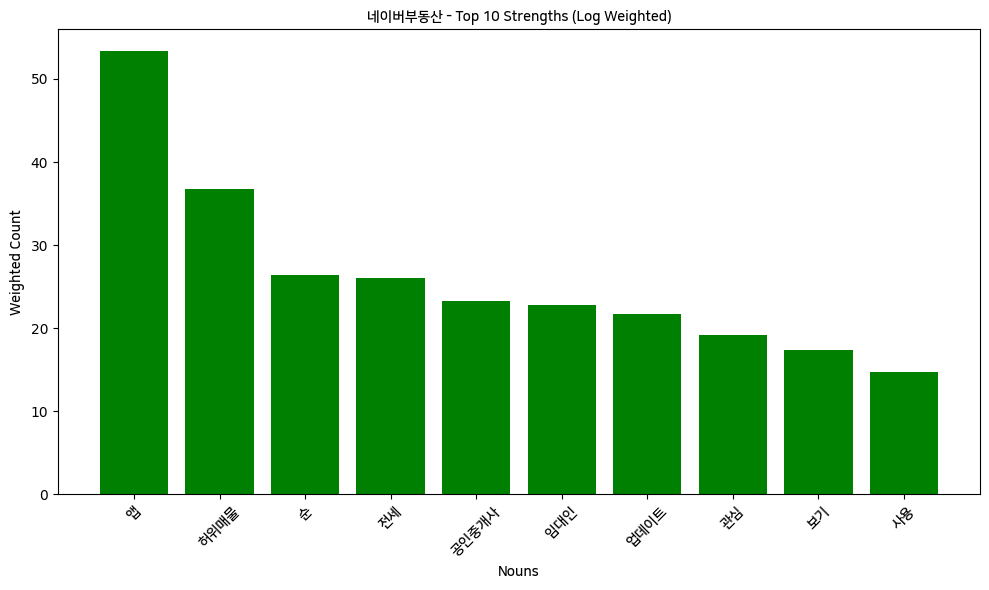

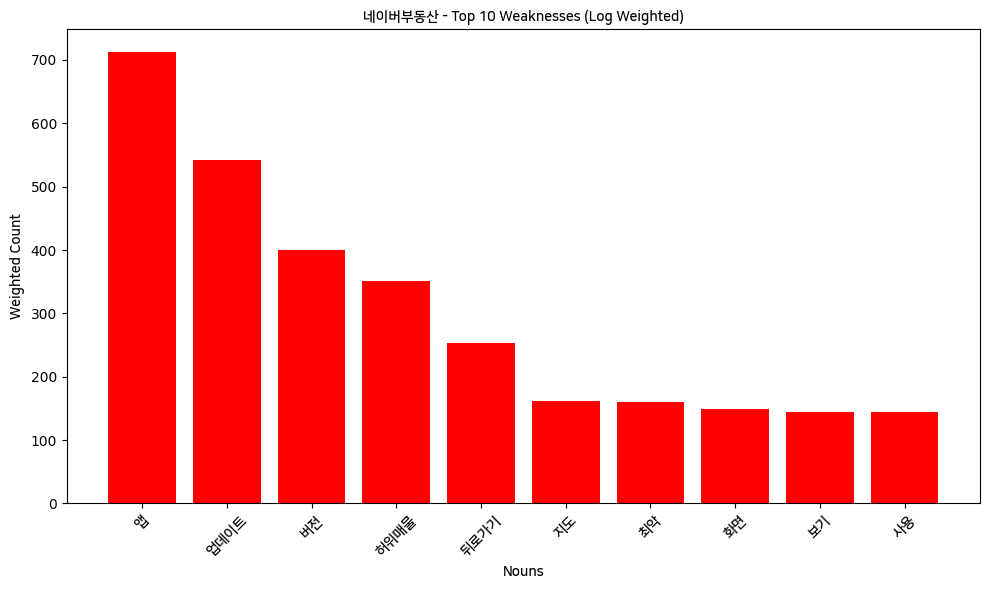

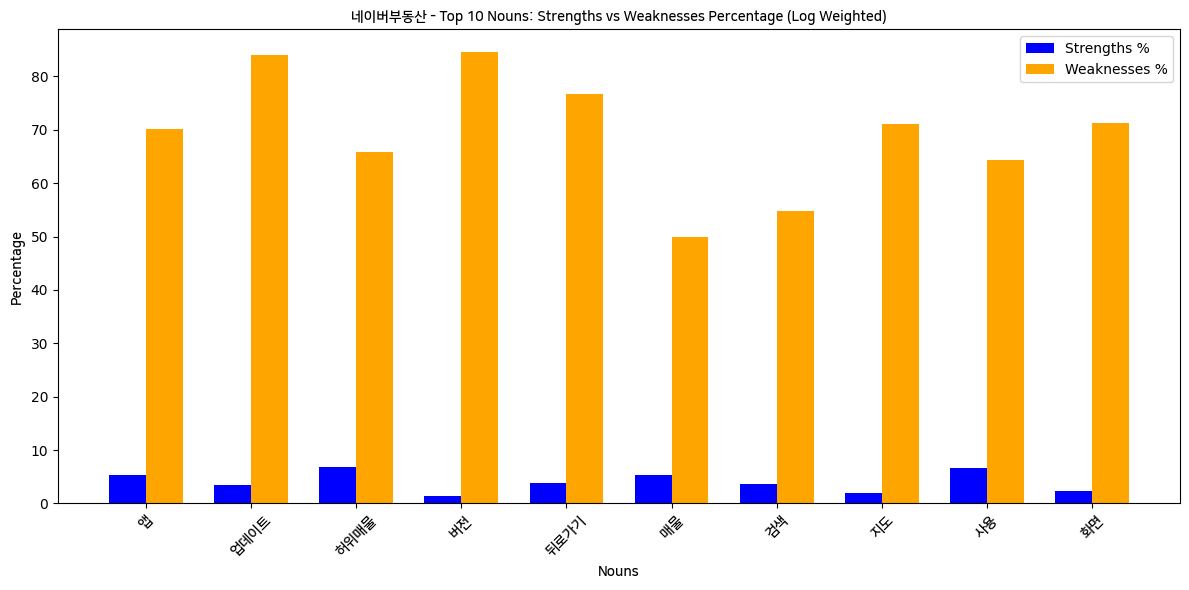

네이버부동산의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/네이버부동산_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/다방_로그가중치_분석결과.csv에 저장되었습니다.



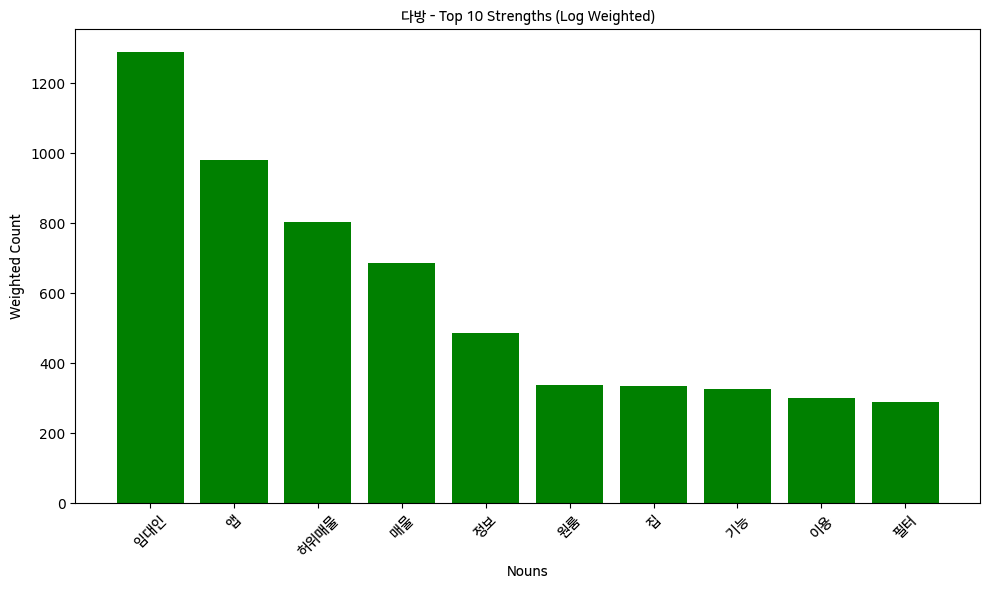

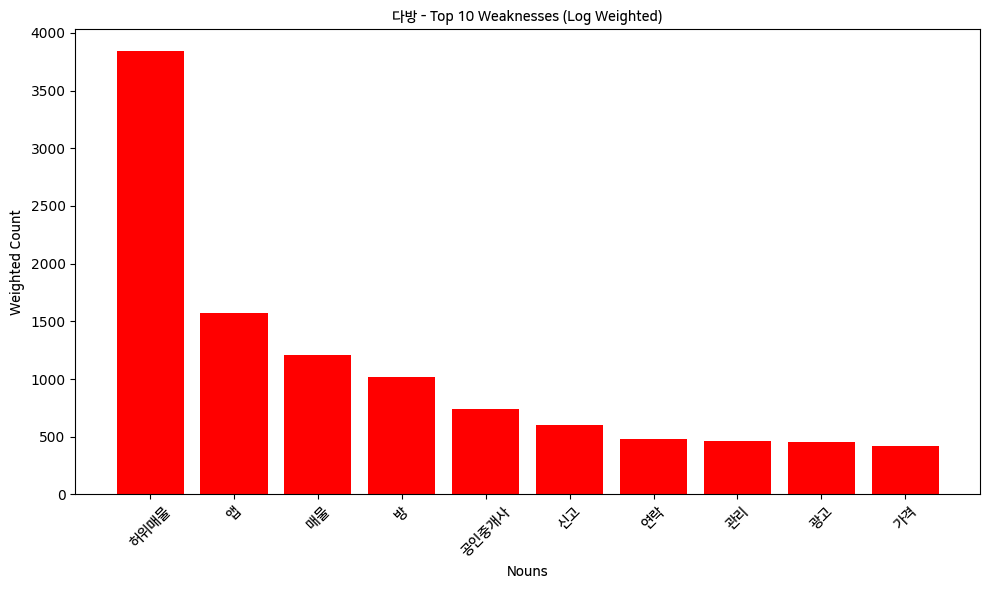

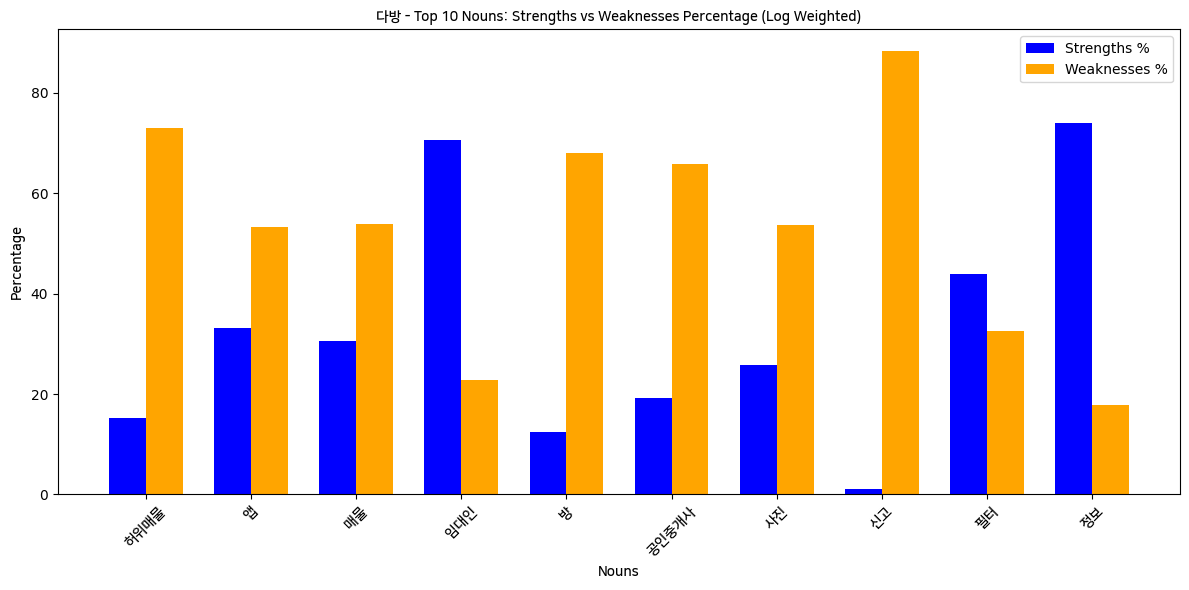

다방의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/다방_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/직방_로그가중치_분석결과.csv에 저장되었습니다.



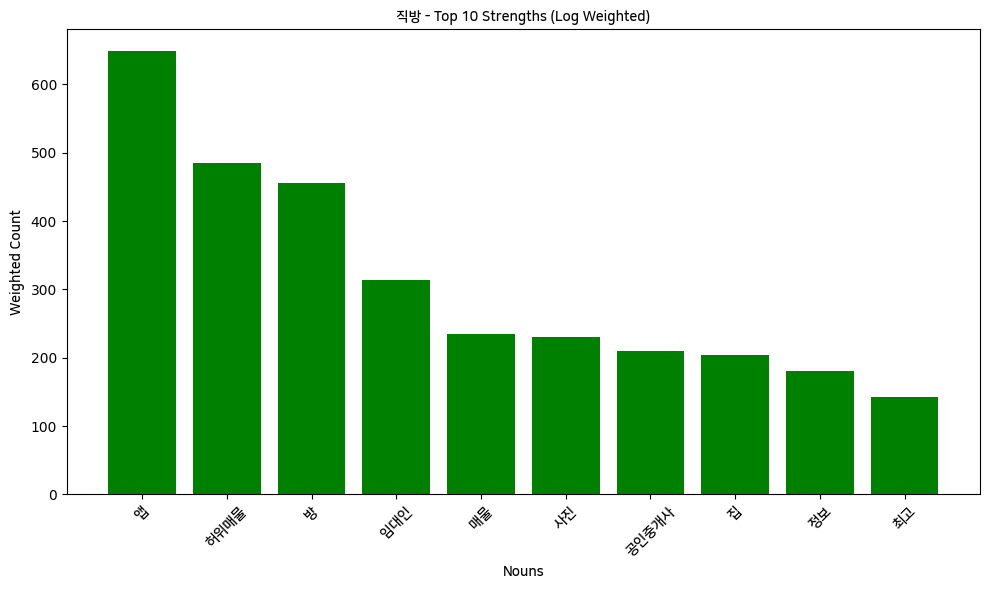

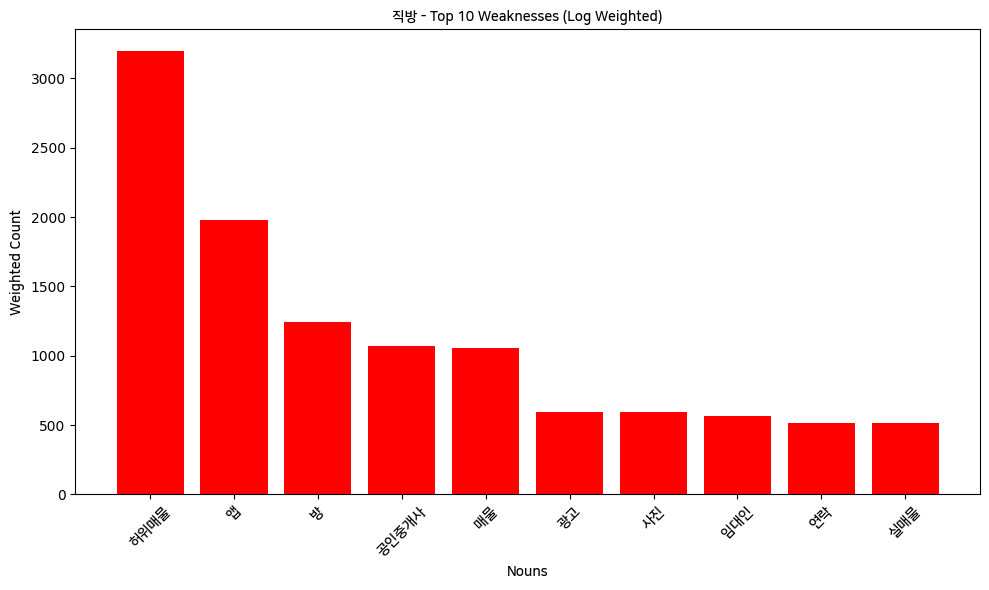

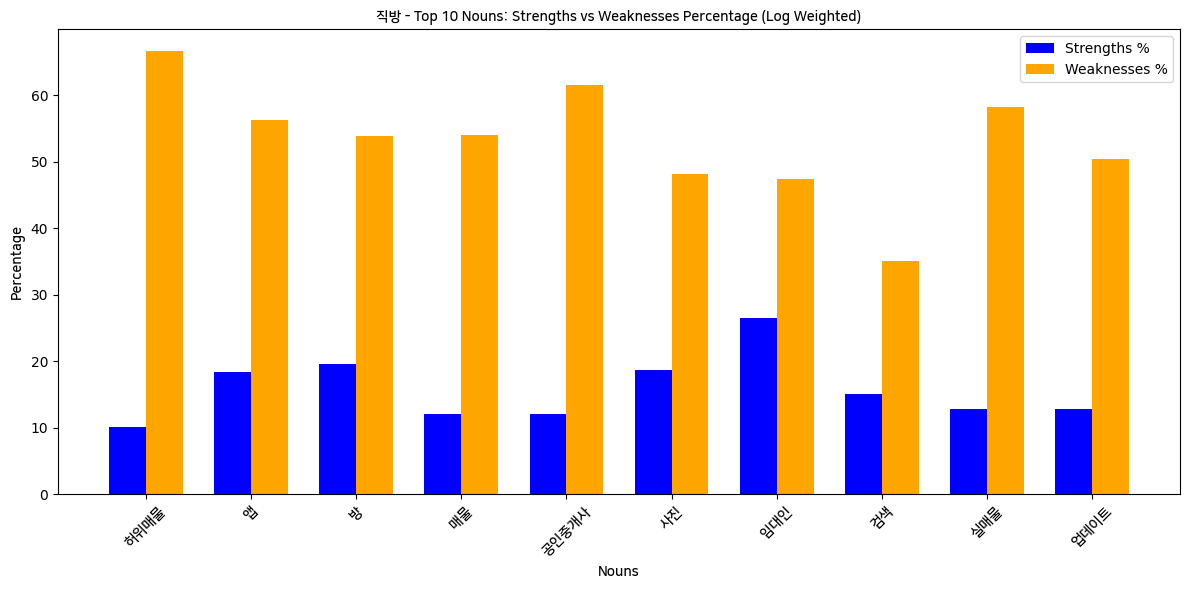

직방의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/직방_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/피터팬_로그가중치_분석결과.csv에 저장되었습니다.



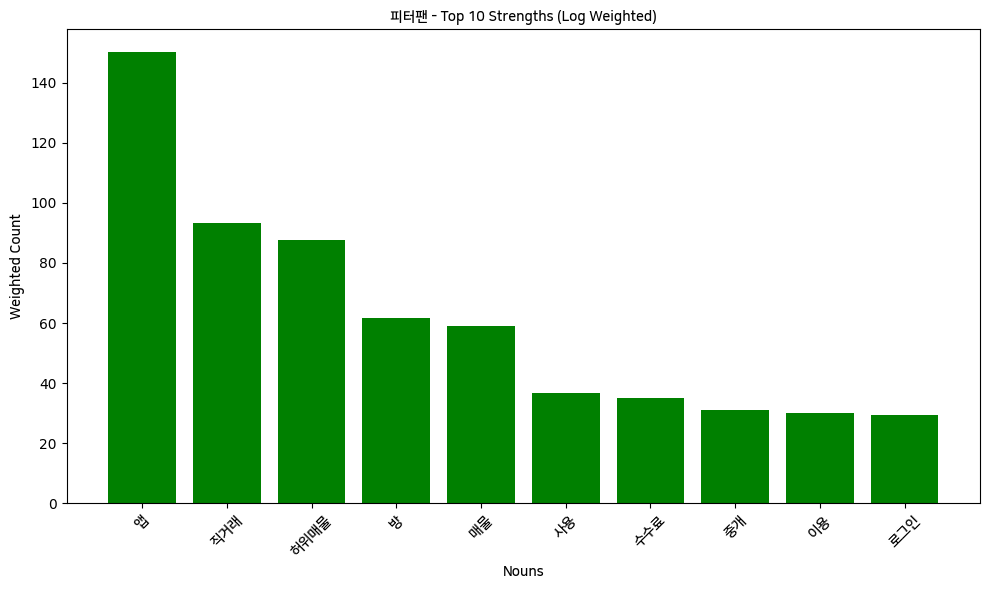

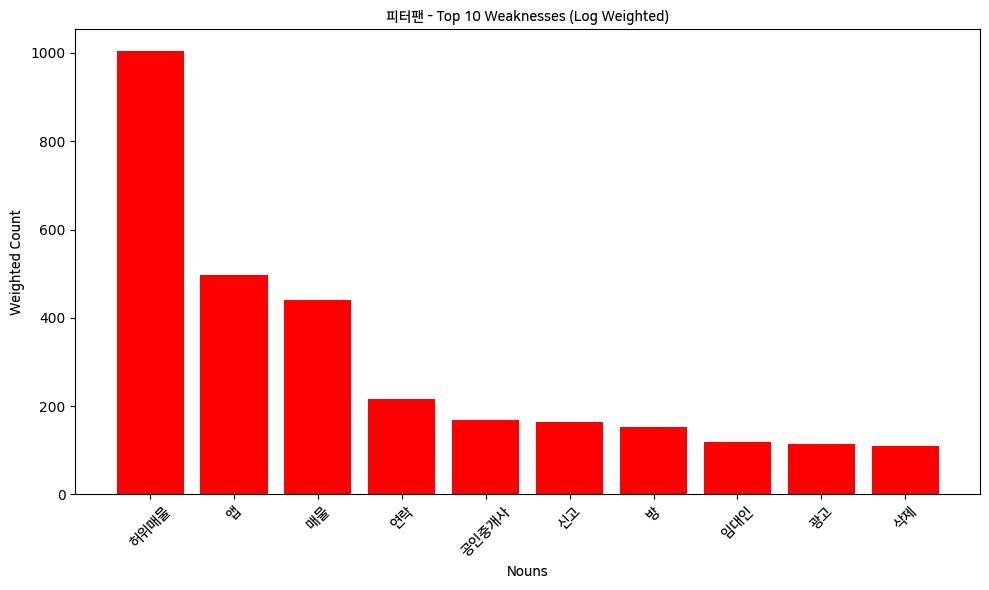

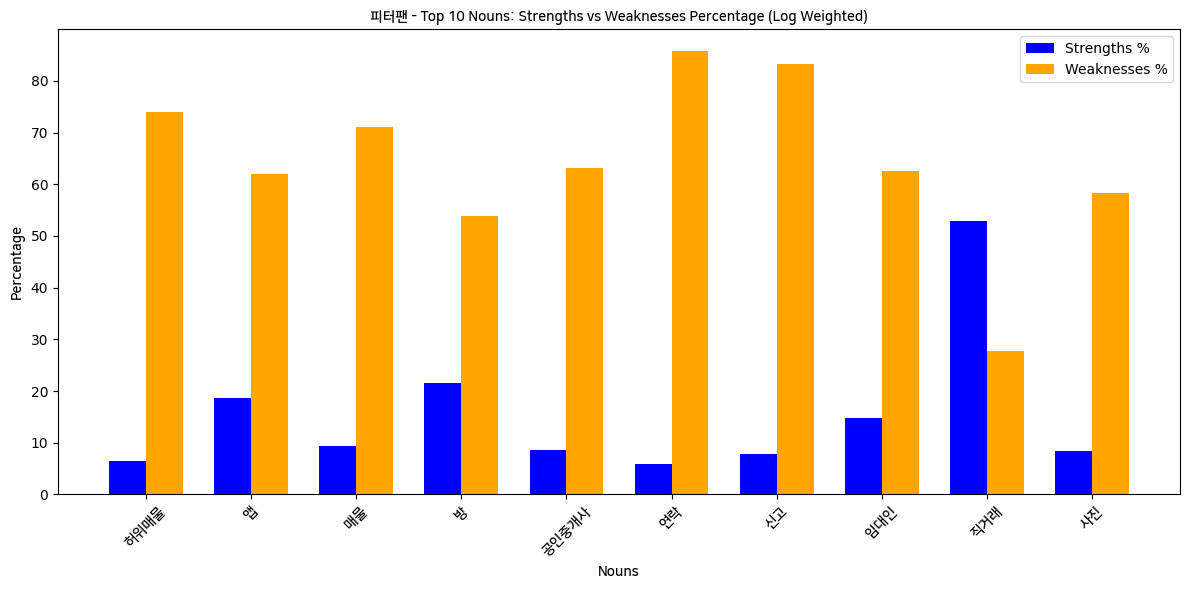

피터팬의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/피터팬_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/호갱노노_로그가중치_분석결과.csv에 저장되었습니다.



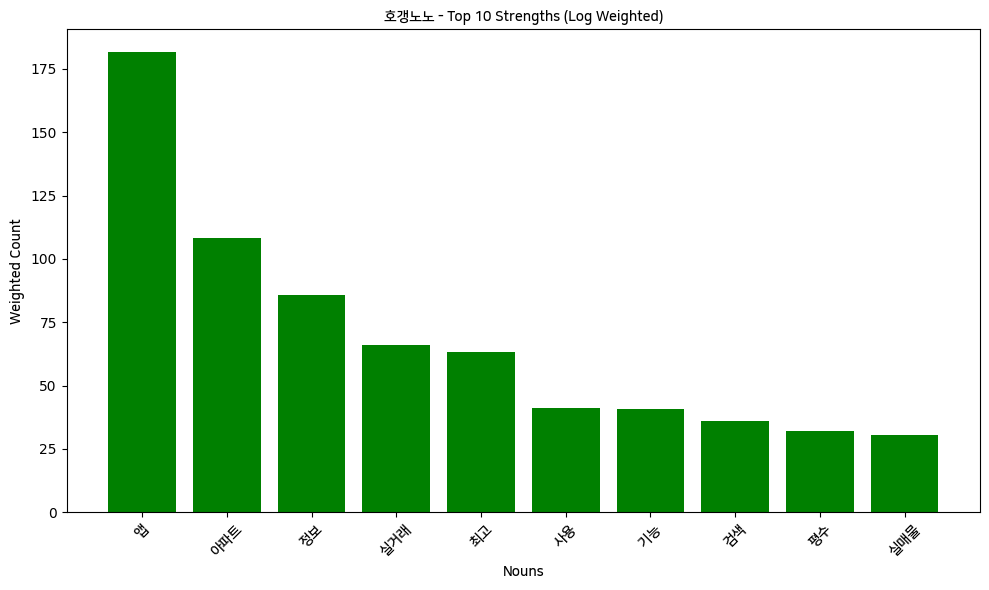

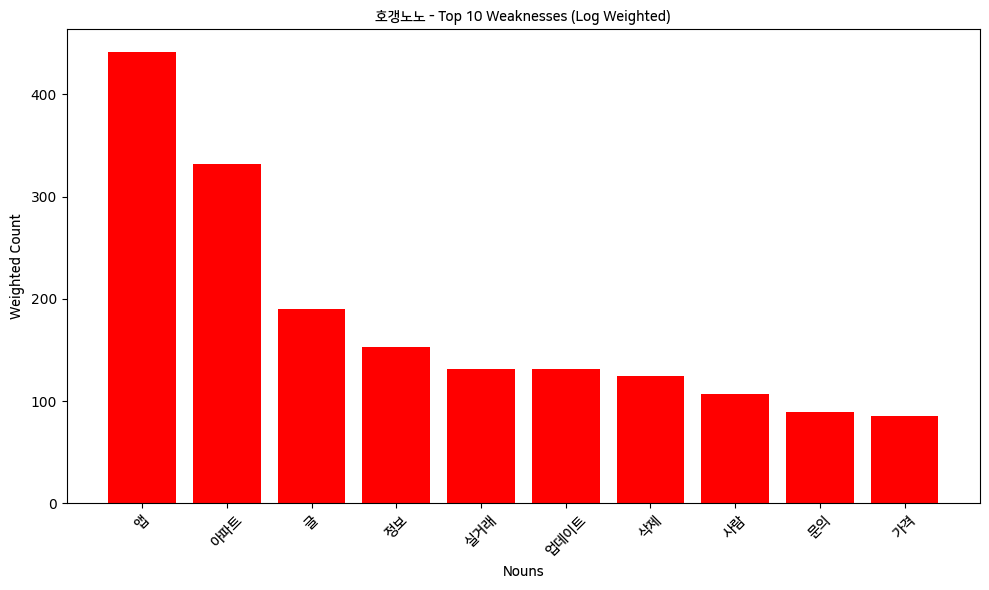

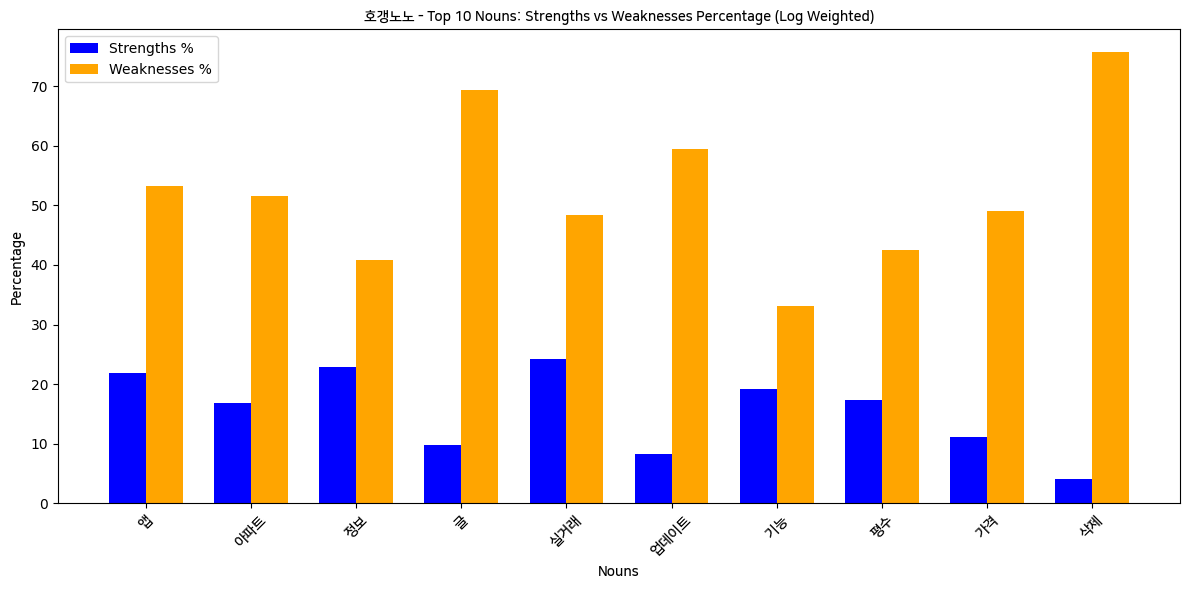

호갱노노의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/호갱노노_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



In [7]:
# 경고 메시지 무시
warnings.filterwarnings("ignore")

# 파일에 대한 분석 수행 및 시각화 함수
def classify_and_visualize_with_log_weights(file):
    # 데이터 불러오기
    df = pd.read_csv(file)

    # 강점, 약점 및 전체를 저장할 딕셔너리 초기화
    strengths = {}
    weaknesses = {}
    all_nouns = {}

    # 각 행을 순회하면서 명사 분류
    for _, row in df.iterrows():
        score = row['score']  # 리뷰의 평점
        thumbs_up = row.get('thumbsUpCount', 0)  # '좋아요' 수
        weight = math.log(thumbs_up + 1)  # 로그 가중치

        try:
            # 'nouns_without_stopwords'가 문자열로 저장되어 있다면 리스트로 변환
            nouns = ast.literal_eval(row['nouns_without_stopwords'])
        except:
            continue  # 변환에 실패하면 해당 행은 건너뜀

        for noun in nouns:
            # 전체 명사에 가중치 누적
            all_nouns[noun] = all_nouns.get(noun, 0) + weight

            # 강점과 약점 분류
            if score >= 5:
                strengths[noun] = strengths.get(noun, 0) + weight
            elif score <= 1:
                weaknesses[noun] = weaknesses.get(noun, 0) + weight

    # 명사 정렬
    all_nouns_sorted = sorted(all_nouns.items(), key=lambda x: x[1], reverse=True)
    strengths_sorted = sorted(strengths.items(), key=lambda x: x[1], reverse=True)
    weaknesses_sorted = sorted(weaknesses.items(), key=lambda x: x[1], reverse=True)

    # 데이터프레임 생성
    comparison_df = pd.DataFrame({
        'Noun': [x[0] for x in all_nouns_sorted],
        'Overall Weighted Count': [x[1] for x in all_nouns_sorted],
        'Strengths Weighted Count': [strengths.get(x[0], 0) for x in all_nouns_sorted],
        'Weaknesses Weighted Count': [weaknesses.get(x[0], 0) for x in all_nouns_sorted],
    })

    comparison_df['Strengths Percentage'] = (
        comparison_df['Strengths Weighted Count'] / comparison_df['Overall Weighted Count'] * 100
    ).round(2)
    comparison_df['Weaknesses Percentage'] = (
        comparison_df['Weaknesses Weighted Count'] / comparison_df['Overall Weighted Count'] * 100
    ).round(2)

    # 파일명에서 출처 이름 추출
    source_name = os.path.basename(file).split('_')[3]

    # 결과 파일 경로 설정
    output_file = os.path.join(output_path, f'{source_name}_로그가중치_분석결과.csv')
    comparison_df.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"{file}의 분석 결과가 {output_file}에 저장되었습니다.\n")

    # 강점과 약점 각각 상위 10개
    top_strengths = comparison_df.nlargest(10, 'Strengths Weighted Count')
    top_weaknesses = comparison_df.nlargest(10, 'Weaknesses Weighted Count')

    # 강점 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(top_strengths['Noun'], top_strengths['Strengths Weighted Count'], color='green')
    plt.title(f'{source_name} - Top 10 Strengths (Log Weighted)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Weighted Count', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f'{source_name}_강점_상위10_로그가중치.png'))
    plt.show()

    # 약점 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(top_weaknesses['Noun'], top_weaknesses['Weaknesses Weighted Count'], color='red')
    plt.title(f'{source_name} - Top 10 Weaknesses (Log Weighted)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Weighted Count', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f'{source_name}_약점_상위10_로그가중치.png'))
    plt.show()

    # 상위 10개 명사 시각화 (Strengths vs Weaknesses Percentage)
    top_n = 10
    top_nouns = comparison_df.head(top_n)

    # 그래프를 위한 x축 설정
    x = range(len(top_nouns))
    bar_width = 0.35

    plt.figure(figsize=(12, 6))

    # Strengths Percentage 막대
    plt.bar([i - bar_width / 2 for i in x], top_nouns['Strengths Percentage'], width=bar_width, color='blue', label='Strengths %')

    # Weaknesses Percentage 막대
    plt.bar([i + bar_width / 2 for i in x], top_nouns['Weaknesses Percentage'], width=bar_width, color='orange', label='Weaknesses %')

    # 그래프 제목 및 축 레이블
    plt.title(f'{source_name} - Top {top_n} Nouns: Strengths vs Weaknesses Percentage (Log Weighted)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Percentage', fontproperties=font_prop)
    plt.xticks(ticks=x, labels=top_nouns['Noun'], rotation=45, fontproperties=font_prop)

    # 범례 추가
    plt.legend()

    # 레이아웃 및 저장
    plt.tight_layout()
    chart_output_file = os.path.join(output_path, f'{source_name}_명사_퍼센트_비교_로그가중치.png')
    plt.savefig(chart_output_file)
    plt.show()

    print(f"{source_name}의 퍼센트 비교 시각화 결과가 {chart_output_file}에 저장되었습니다.\n")


# 파일 리스트 정의
files = [
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv',
    # 다른 파일 추가 가능
]

# 모든 파일에 대해 분석 실행
for file in files:
    if os.path.exists(file):
        classify_and_visualize_with_log_weights(file)
    else:
        print(f"File not found: {file}")

/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/네이버부동산_로그가중치_분석결과.csv에 저장되었습니다.



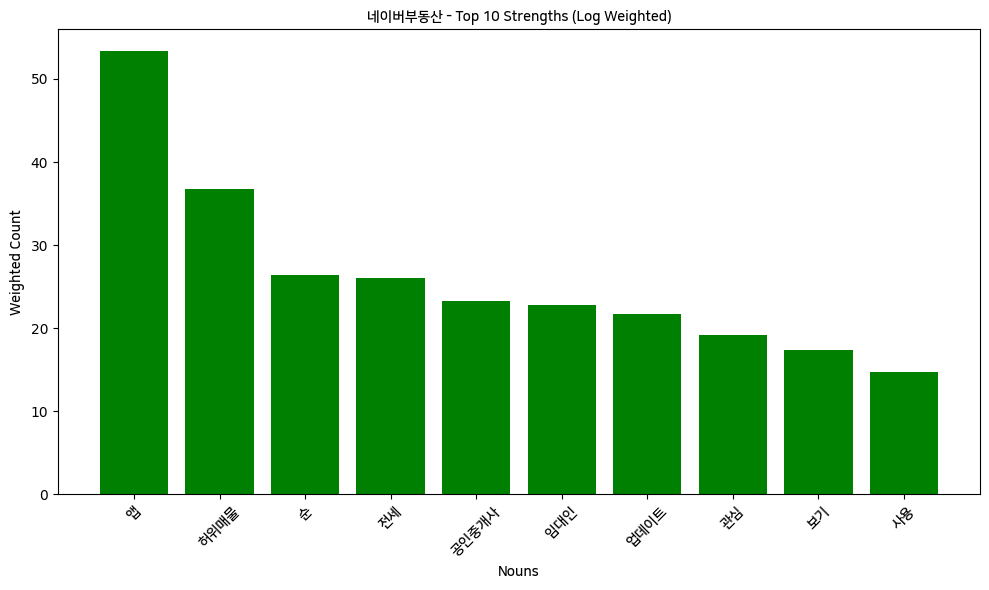

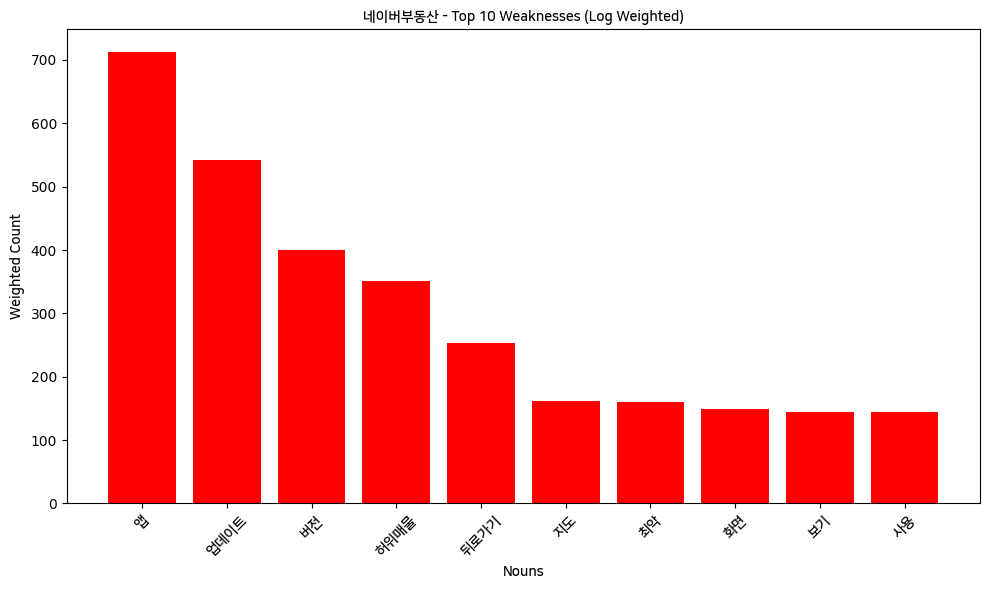

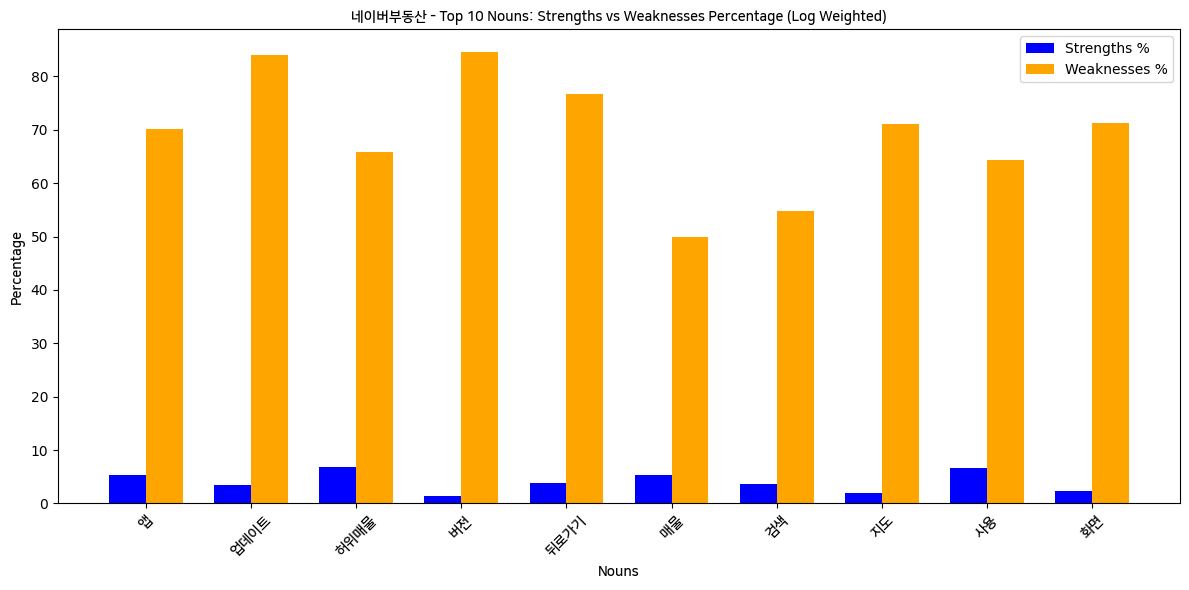

네이버부동산의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/네이버부동산_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/다방_로그가중치_분석결과.csv에 저장되었습니다.



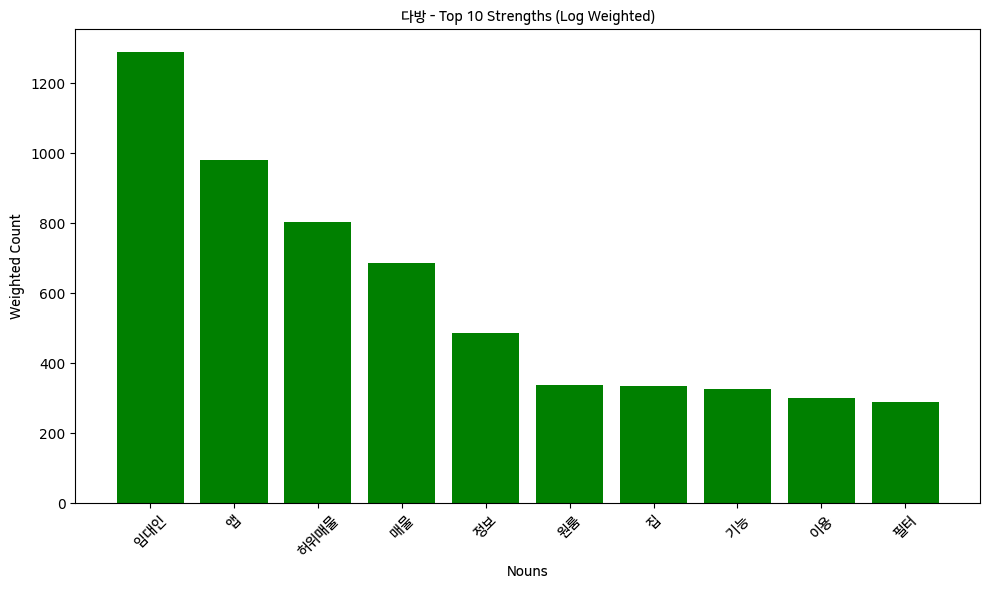

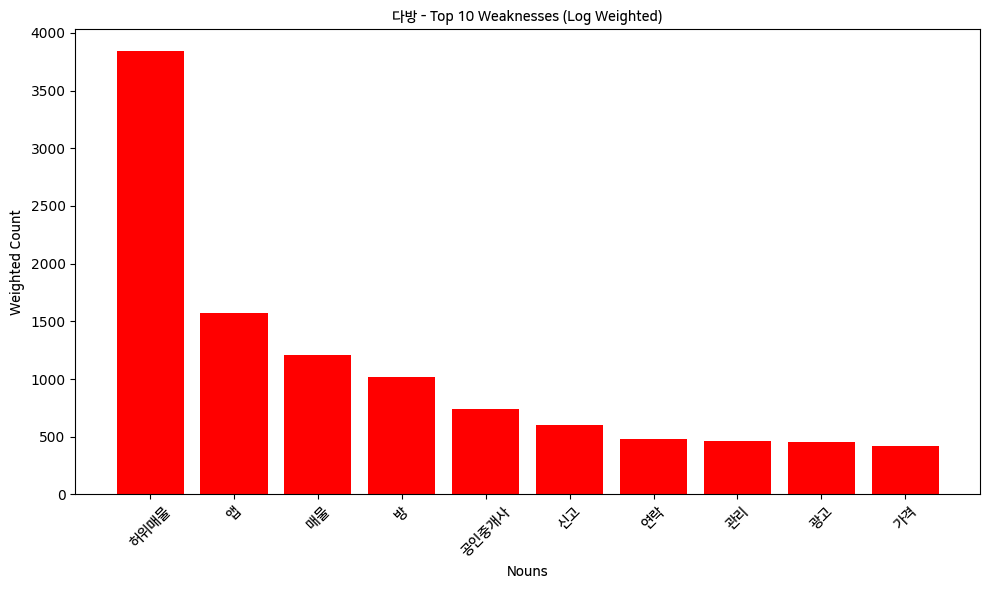

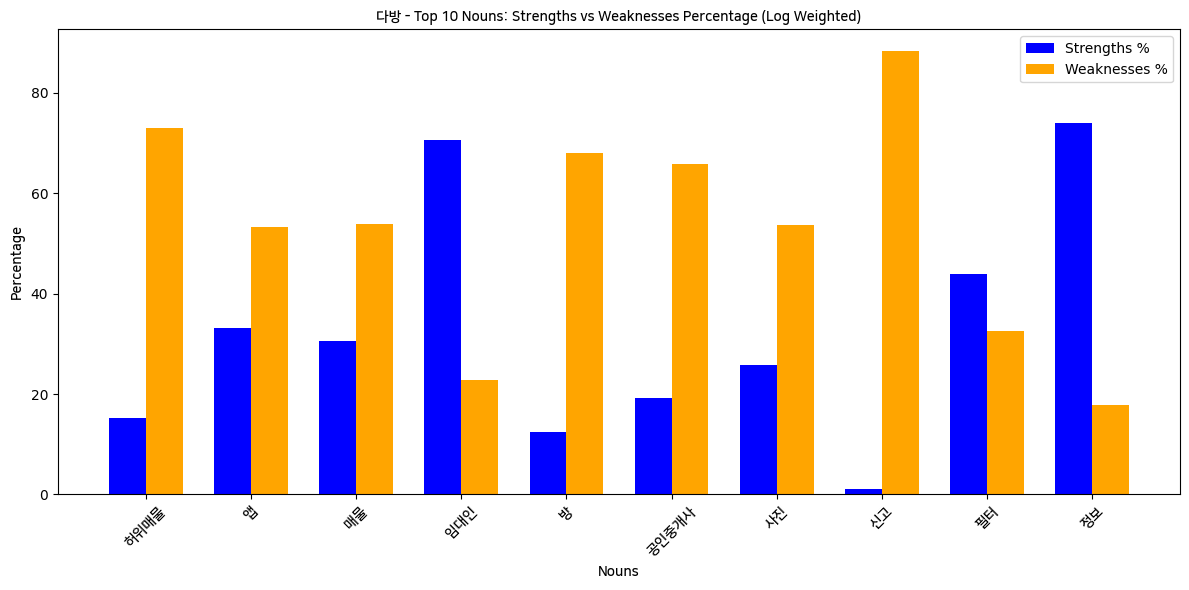

다방의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/다방_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/직방_로그가중치_분석결과.csv에 저장되었습니다.



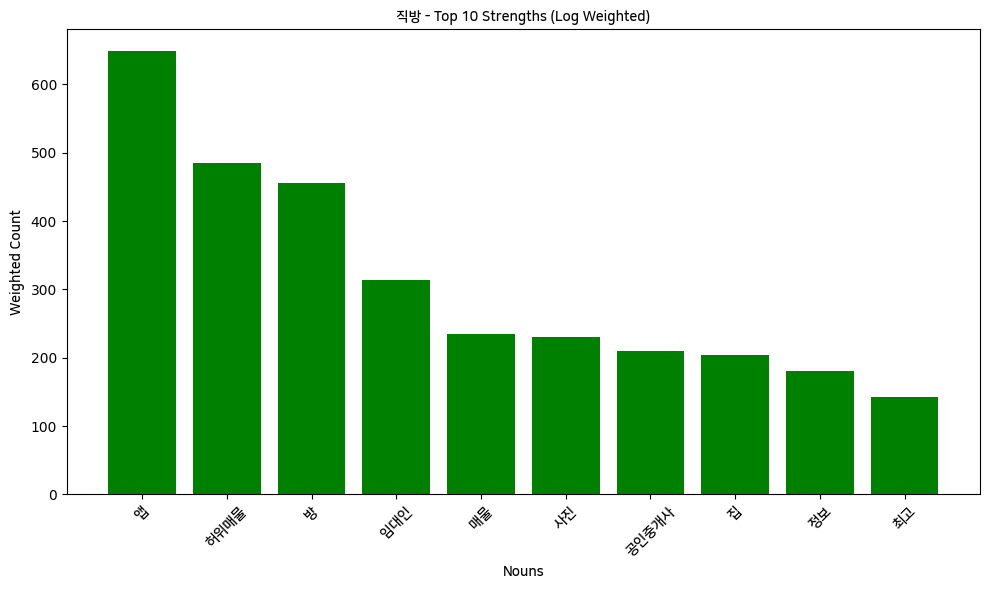

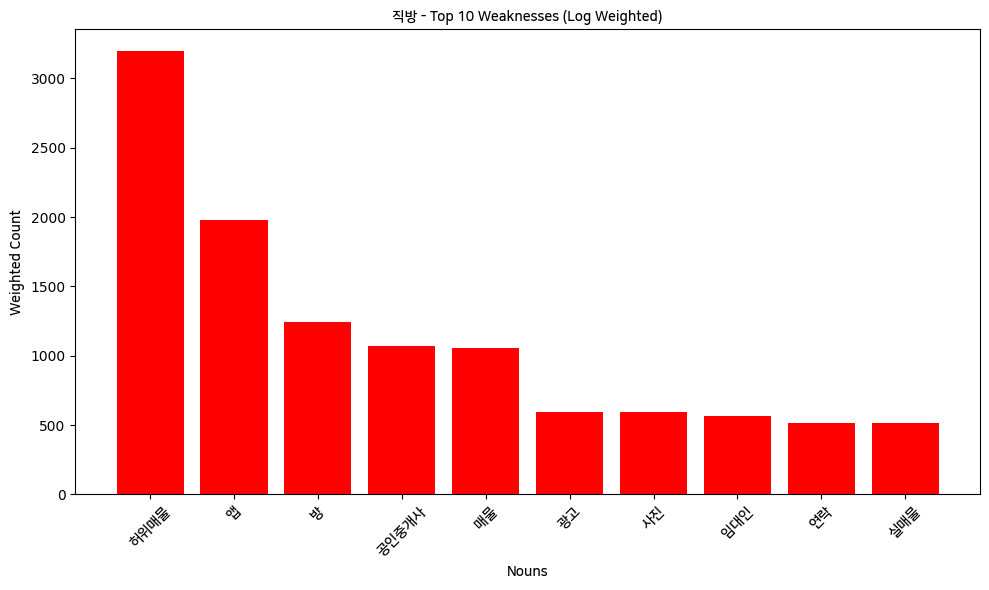

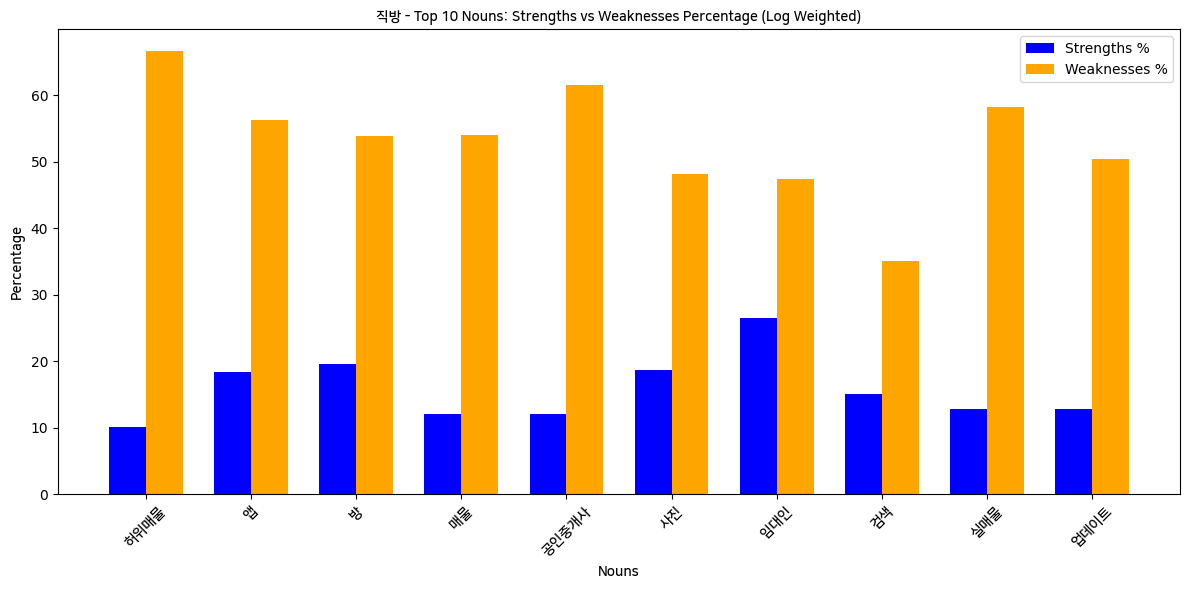

직방의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/직방_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/피터팬_로그가중치_분석결과.csv에 저장되었습니다.



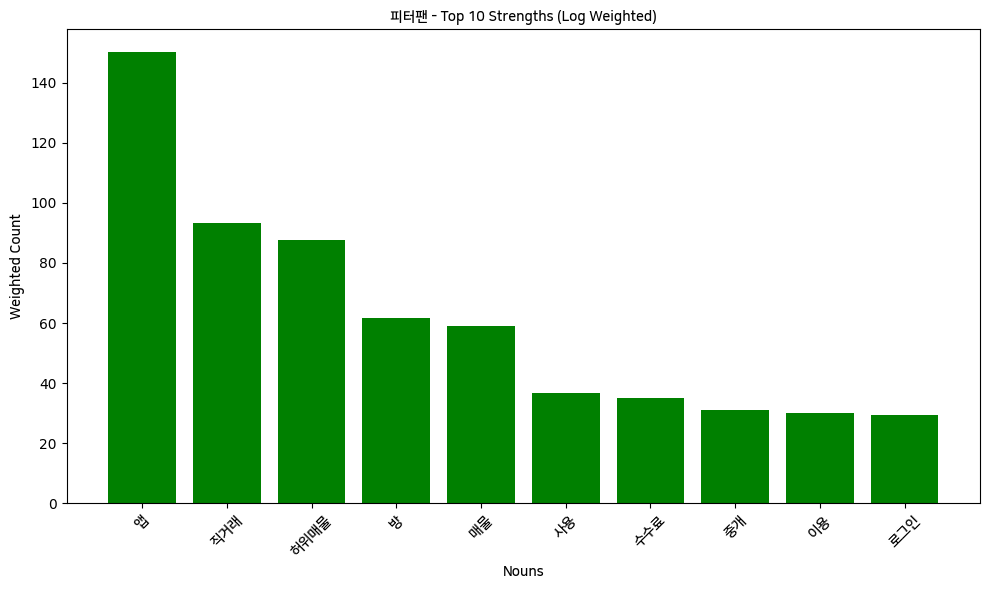

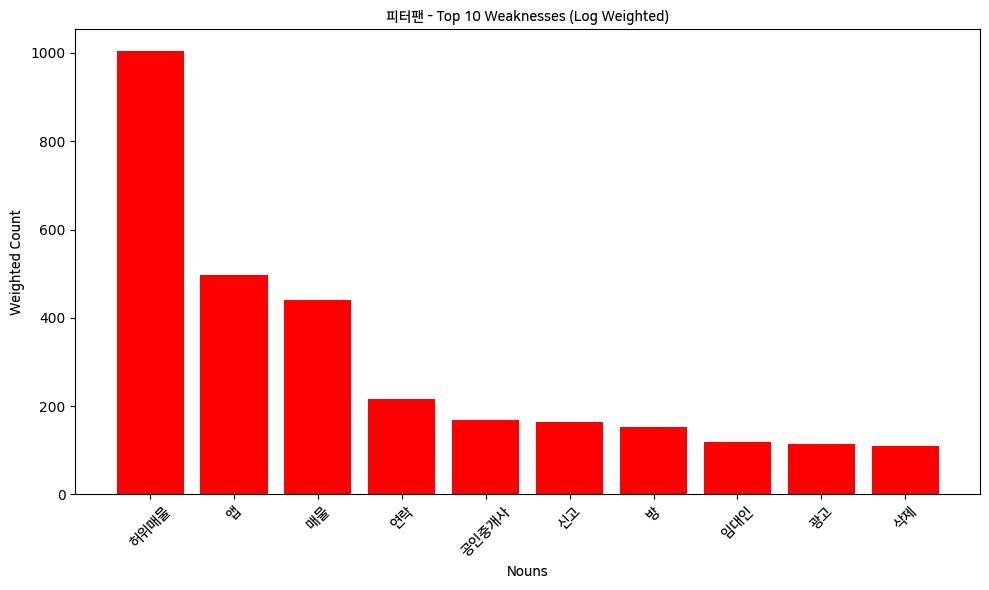

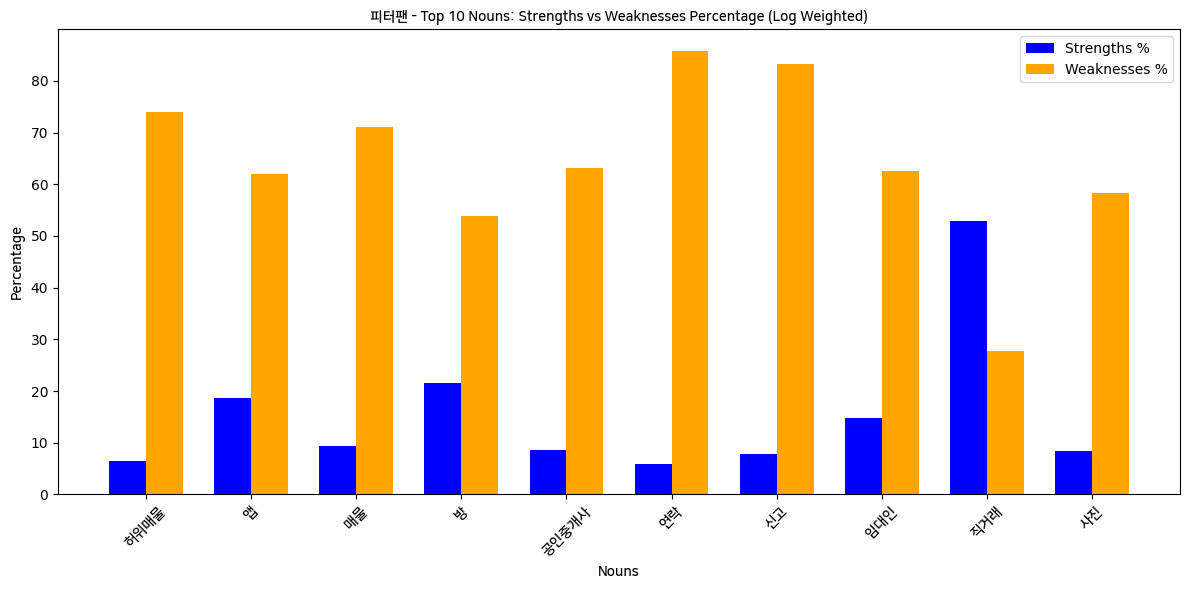

피터팬의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/피터팬_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/호갱노노_로그가중치_분석결과.csv에 저장되었습니다.



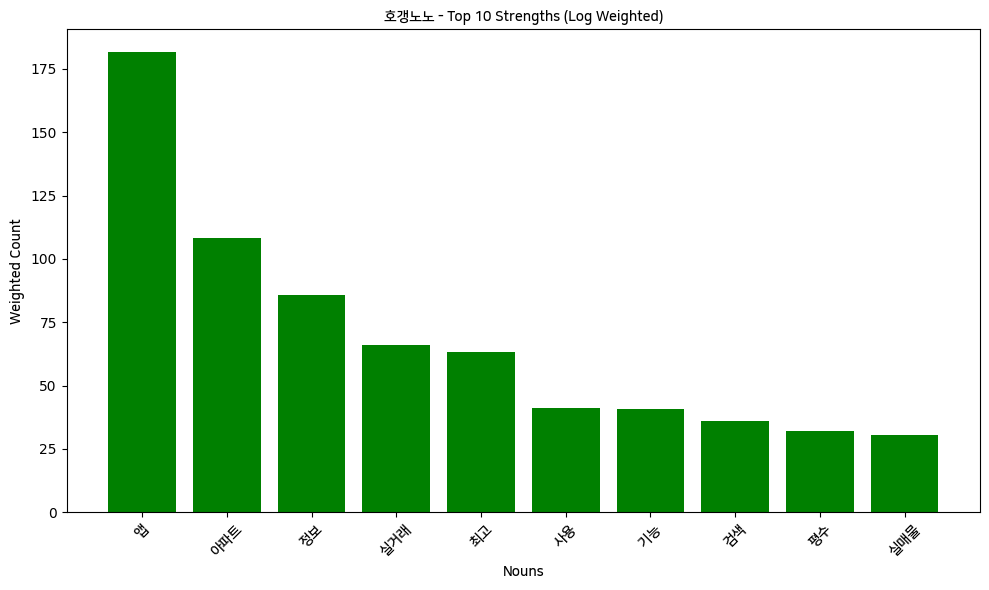

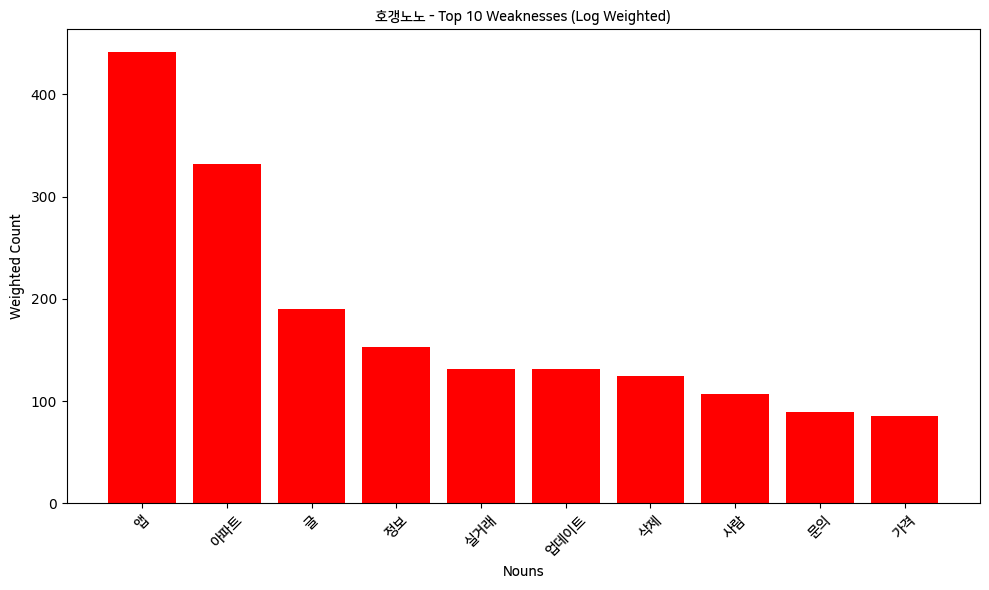

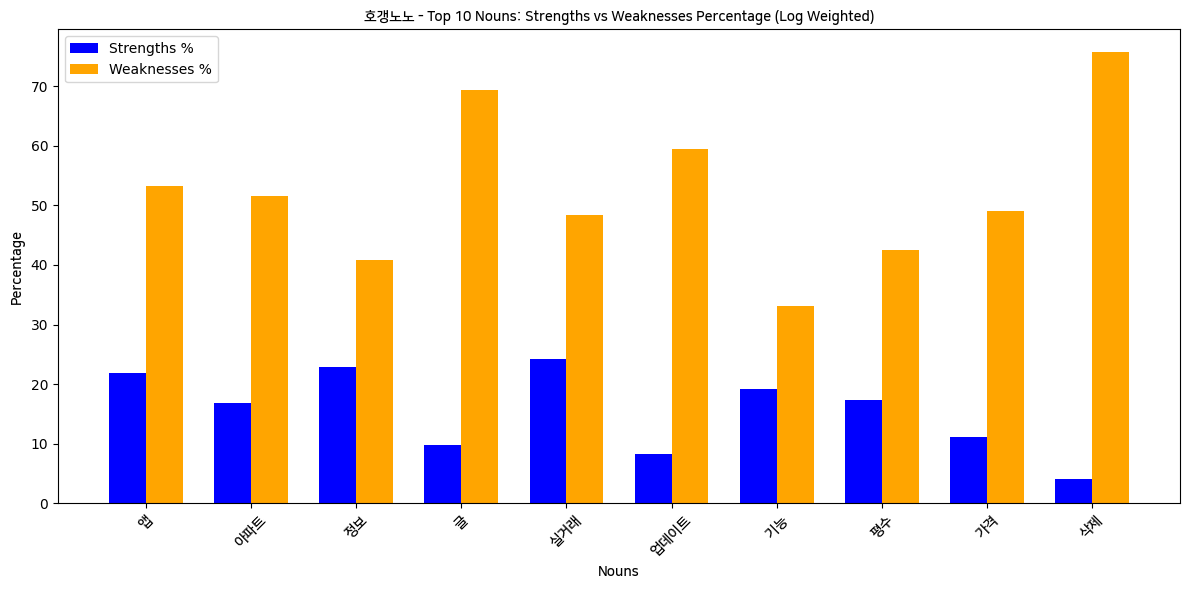

호갱노노의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/호갱노노_명사_퍼센트_비교_로그가중치.png에 저장되었습니다.



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
import math
import logging

# 경고 및 로그 메시지 억제
warnings.filterwarnings("ignore")  # 일반 경고 억제
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)  # 폰트 경고 억제
plt.rcParams.update({'axes.unicode_minus': False})  # matplotlib의 마이너스 깨짐 방지

# 결과 저장 경로 설정
output_path = '/content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4'
os.makedirs(output_path, exist_ok=True)  # 결과 저장 폴더 생성

# 분석 및 시각화 함수
def classify_and_visualize_with_log_weights(file):
    # 데이터 불러오기
    df = pd.read_csv(file)

    # 강점, 약점 및 전체를 저장할 딕셔너리 초기화
    strengths = {}
    weaknesses = {}
    all_nouns = {}

    # 각 행을 순회하면서 명사 분류
    for _, row in df.iterrows():
        score = row['score']  # 리뷰 평점
        thumbs_up = row.get('thumbsUpCount', 0)  # '좋아요' 수
        weight = math.log(thumbs_up + 1)  # 로그 가중치

        try:
            # 'nouns_without_stopwords'가 문자열로 저장되어 있다면 리스트로 변환
            nouns = ast.literal_eval(row['nouns_without_stopwords'])
        except:
            continue  # 변환에 실패하면 해당 행 건너뜀

        for noun in nouns:
            # 전체 명사에 가중치 누적
            all_nouns[noun] = all_nouns.get(noun, 0) + weight

            # 강점과 약점 분류
            if score >= 5:
                strengths[noun] = strengths.get(noun, 0) + weight
            elif score <= 1:
                weaknesses[noun] = weaknesses.get(noun, 0) + weight

    # 명사 정렬
    all_nouns_sorted = sorted(all_nouns.items(), key=lambda x: x[1], reverse=True)
    strengths_sorted = sorted(strengths.items(), key=lambda x: x[1], reverse=True)
    weaknesses_sorted = sorted(weaknesses.items(), key=lambda x: x[1], reverse=True)

    # 데이터프레임 생성
    comparison_df = pd.DataFrame({
        'Noun': [x[0] for x in all_nouns_sorted],
        'Overall Weighted Count': [x[1] for x in all_nouns_sorted],
        'Strengths Weighted Count': [strengths.get(x[0], 0) for x in all_nouns_sorted],
        'Weaknesses Weighted Count': [weaknesses.get(x[0], 0) for x in all_nouns_sorted],
    })

    comparison_df['Strengths Percentage'] = (
        comparison_df['Strengths Weighted Count'] / comparison_df['Overall Weighted Count'] * 100
    ).round(2)
    comparison_df['Weaknesses Percentage'] = (
        comparison_df['Weaknesses Weighted Count'] / comparison_df['Overall Weighted Count'] * 100
    ).round(2)

    # 파일명에서 출처 이름 추출
    source_name = os.path.basename(file).split('_')[3]

    # 결과 파일 경로 설정
    output_file = os.path.join(output_path, f'{source_name}_로그가중치_분석결과.csv')
    comparison_df.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"{file}의 분석 결과가 {output_file}에 저장되었습니다.\n")

    # 강점과 약점 각각 상위 10개
    top_strengths = comparison_df.nlargest(10, 'Strengths Weighted Count')
    top_weaknesses = comparison_df.nlargest(10, 'Weaknesses Weighted Count')

    # 강점 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(top_strengths['Noun'], top_strengths['Strengths Weighted Count'], color='green')
    plt.title(f'{source_name} - Top 10 Strengths (Log Weighted)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Weighted Count', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f'{source_name}_강점_상위10_로그가중치.png'))
    plt.show()

    # 약점 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(top_weaknesses['Noun'], top_weaknesses['Weaknesses Weighted Count'], color='red')
    plt.title(f'{source_name} - Top 10 Weaknesses (Log Weighted)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Weighted Count', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f'{source_name}_약점_상위10_로그가중치.png'))
    plt.show()

    # 상위 10개 명사 시각화 (Strengths vs Weaknesses Percentage)
    top_n = 10
    top_nouns = comparison_df.head(top_n)

    # 그래프를 위한 x축 설정
    x = range(len(top_nouns))
    bar_width = 0.35

    plt.figure(figsize=(12, 6))

    # Strengths Percentage 막대
    plt.bar([i - bar_width / 2 for i in x], top_nouns['Strengths Percentage'], width=bar_width, color='blue', label='Strengths %')

    # Weaknesses Percentage 막대
    plt.bar([i + bar_width / 2 for i in x], top_nouns['Weaknesses Percentage'], width=bar_width, color='orange', label='Weaknesses %')

    # 그래프 제목 및 축 레이블
    plt.title(f'{source_name} - Top {top_n} Nouns: Strengths vs Weaknesses Percentage (Log Weighted)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Percentage', fontproperties=font_prop)
    plt.xticks(ticks=x, labels=top_nouns['Noun'], rotation=45, fontproperties=font_prop)

    # 범례 추가
    plt.legend()

    # 레이아웃 및 저장
    plt.tight_layout()
    chart_output_file = os.path.join(output_path, f'{source_name}_명사_퍼센트_비교_로그가중치.png')
    plt.savefig(chart_output_file)
    plt.show()

    print(f"{source_name}의 퍼센트 비교 시각화 결과가 {chart_output_file}에 저장되었습니다.\n")


# 파일 리스트 정의
files = [
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv',
]

# 모든 파일에 대해 분석 실행
for file in files:
    if os.path.exists(file):
        classify_and_visualize_with_log_weights(file)
    else:
        print(f"File not found: {file}")


/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/네이버부동산_정규화_분석결과.csv에 저장되었습니다.
전체 리뷰 수: 2348, 5점 이상 리뷰 수: 319, 1점 이하 리뷰 수: 1541



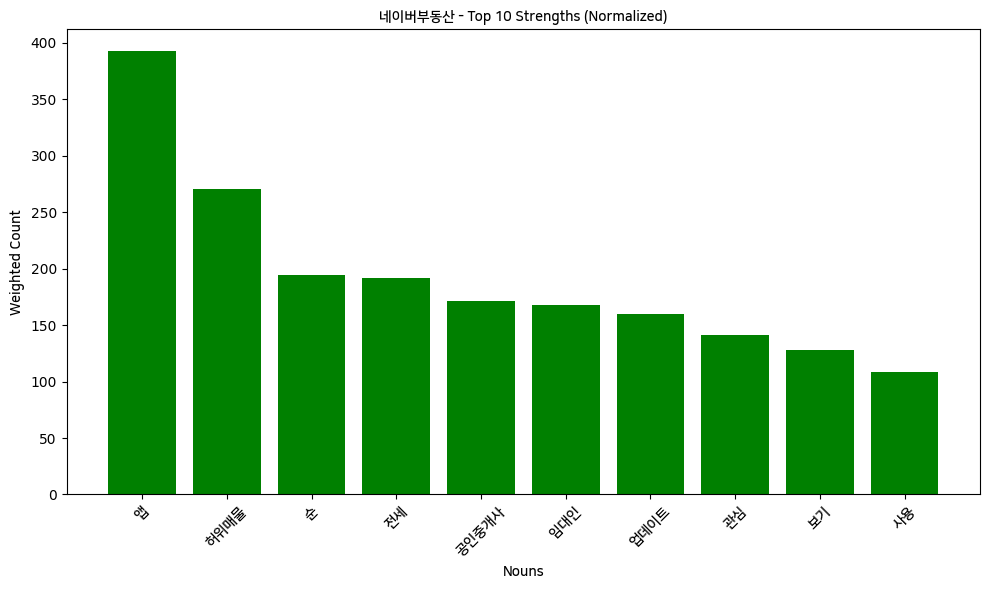

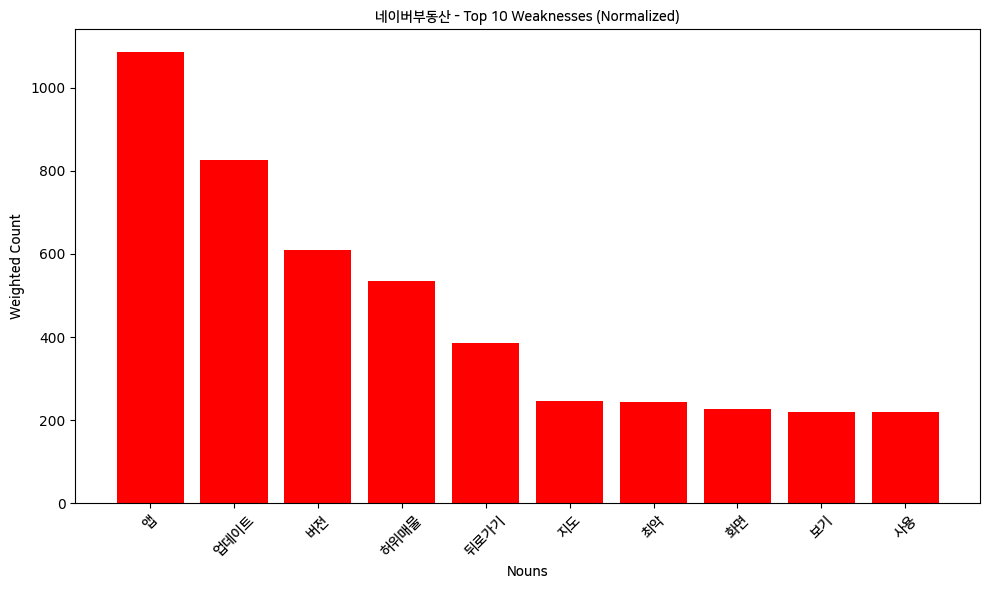

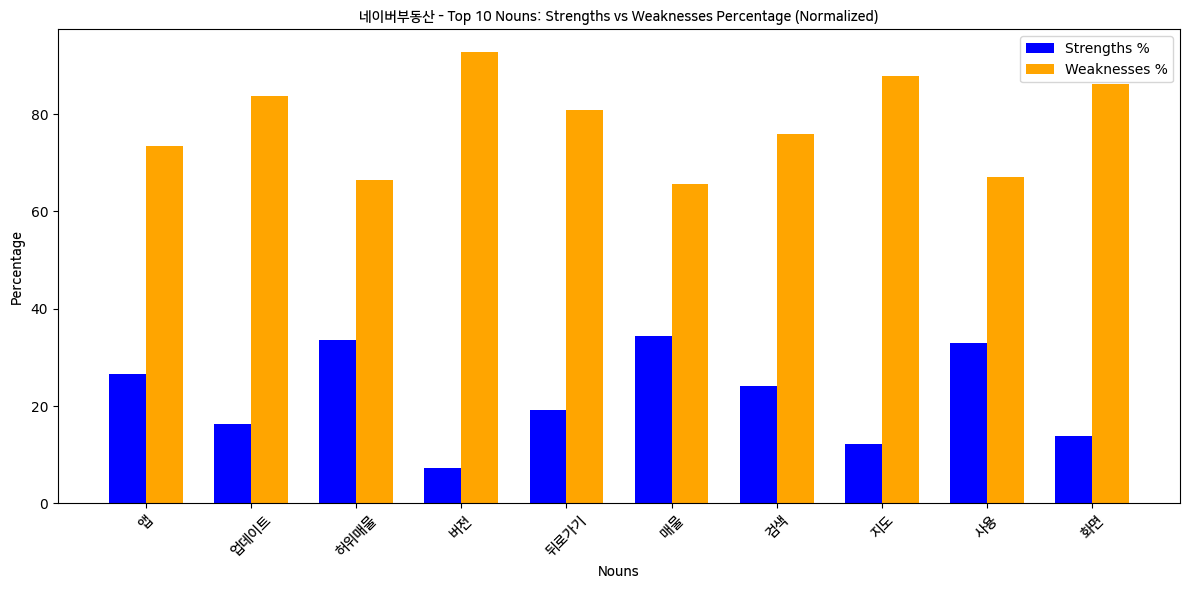

네이버부동산의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/네이버부동산_명사_퍼센트_비교_정규화.png에 저장되었습니다.

/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/다방_정규화_분석결과.csv에 저장되었습니다.
전체 리뷰 수: 25225, 5점 이상 리뷰 수: 19472, 1점 이하 리뷰 수: 3582



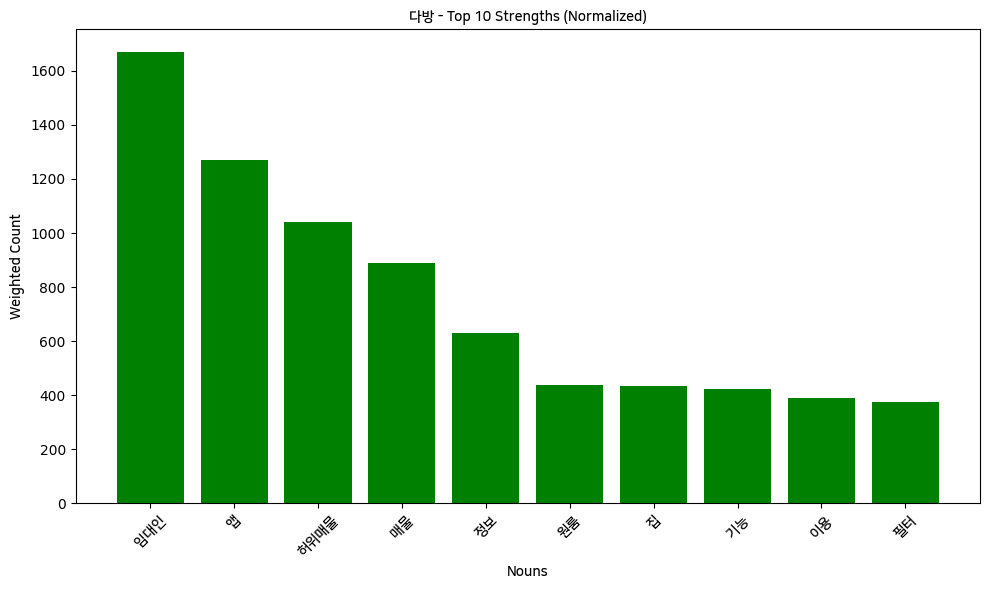

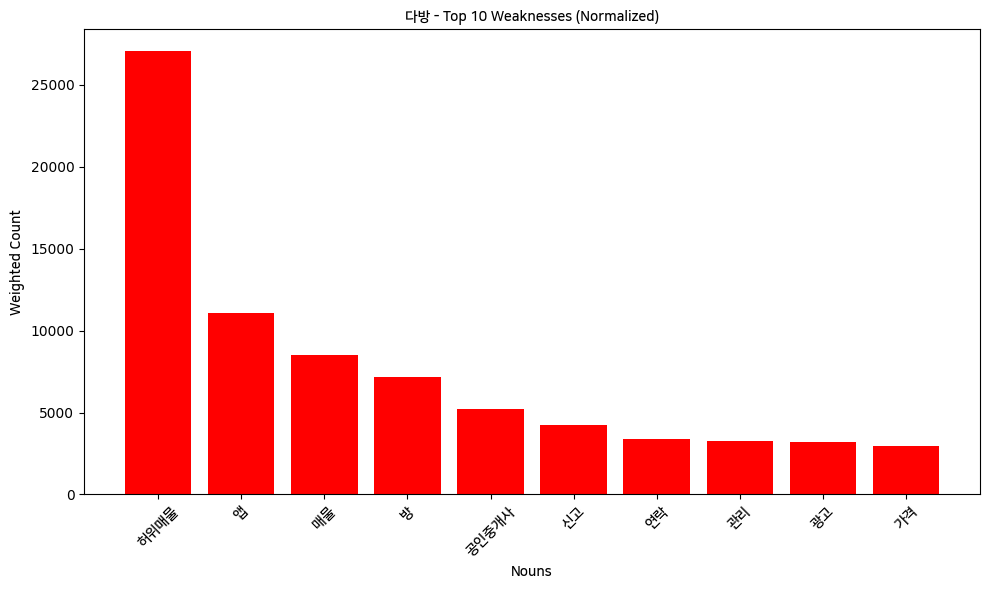

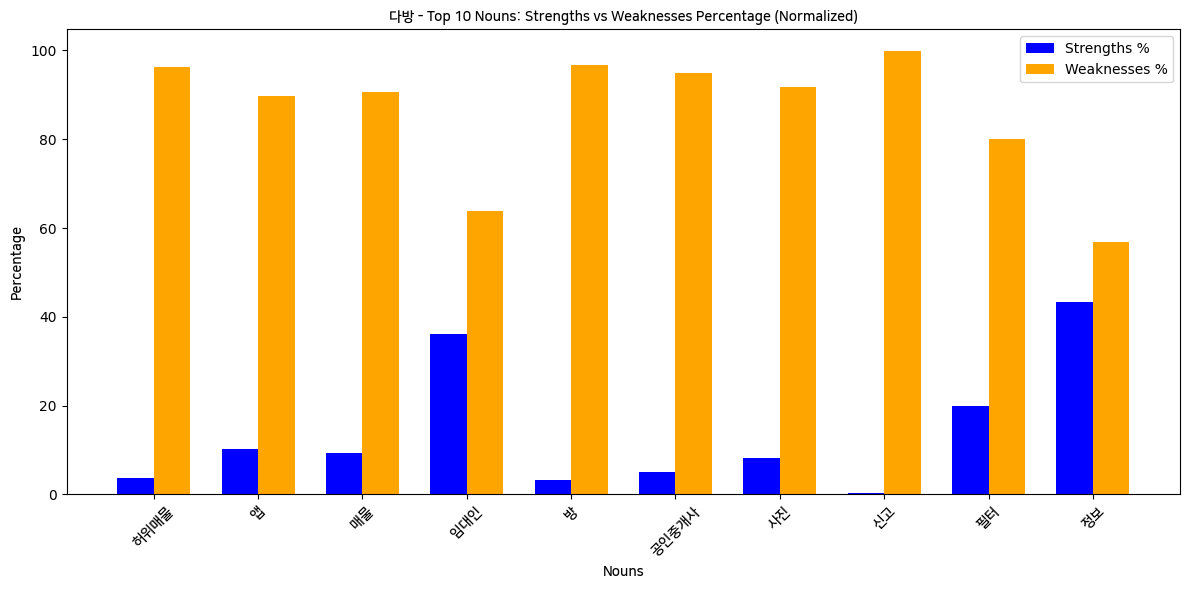

다방의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/다방_명사_퍼센트_비교_정규화.png에 저장되었습니다.

/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/직방_정규화_분석결과.csv에 저장되었습니다.
전체 리뷰 수: 31990, 5점 이상 리뷰 수: 17978, 1점 이하 리뷰 수: 6874



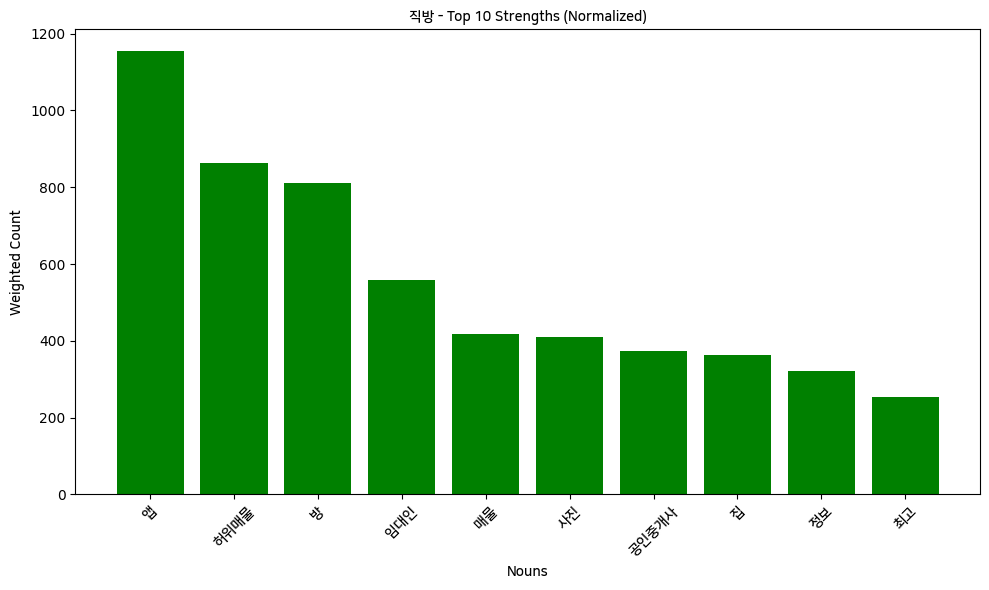

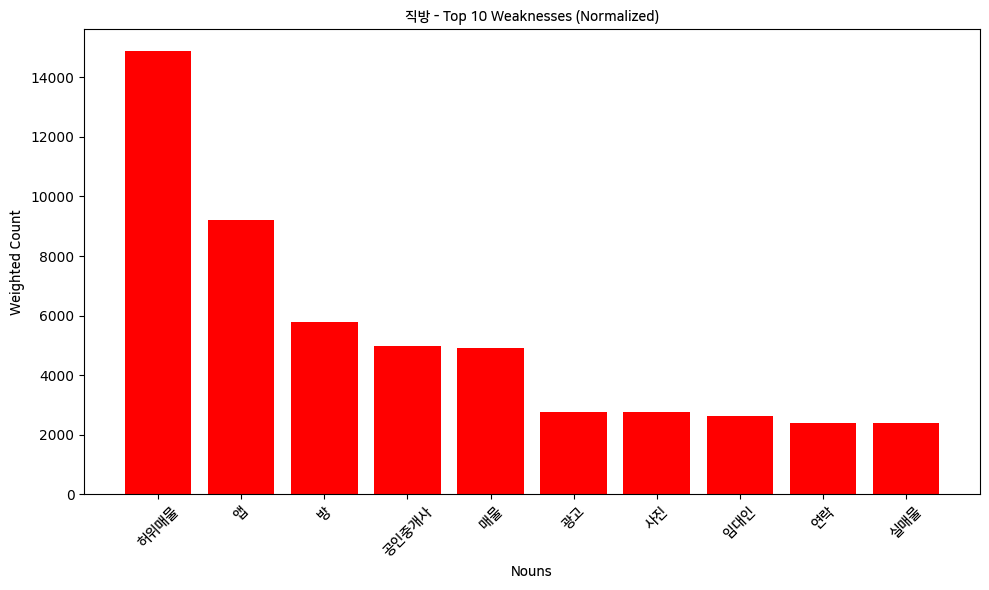

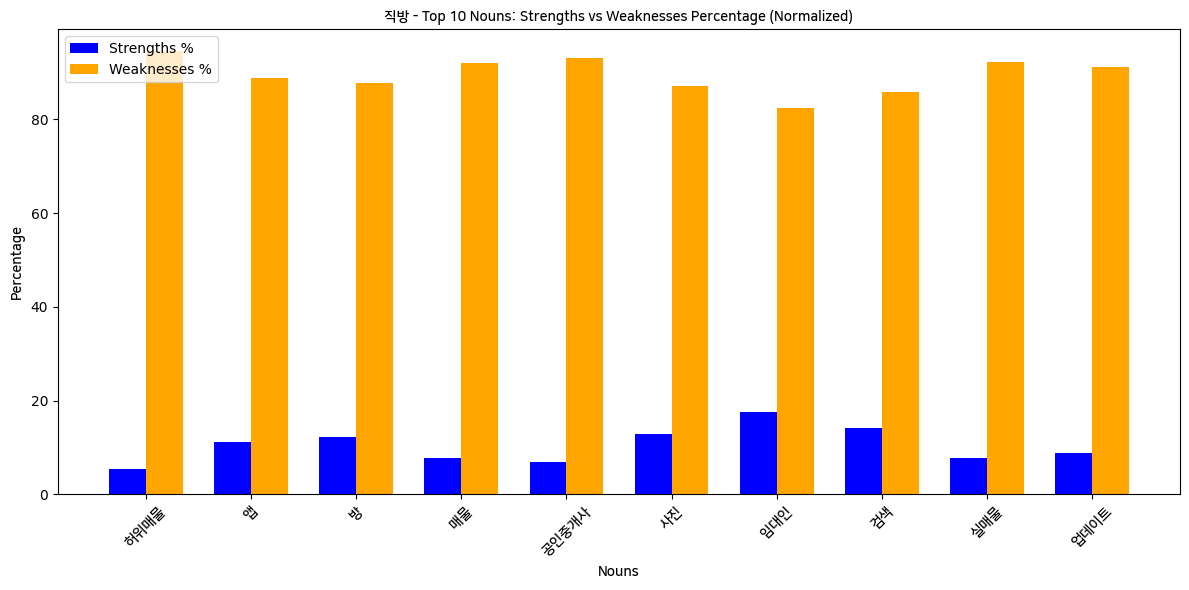

직방의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/직방_명사_퍼센트_비교_정규화.png에 저장되었습니다.

/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/피터팬_정규화_분석결과.csv에 저장되었습니다.
전체 리뷰 수: 9271, 5점 이상 리뷰 수: 7677, 1점 이하 리뷰 수: 941



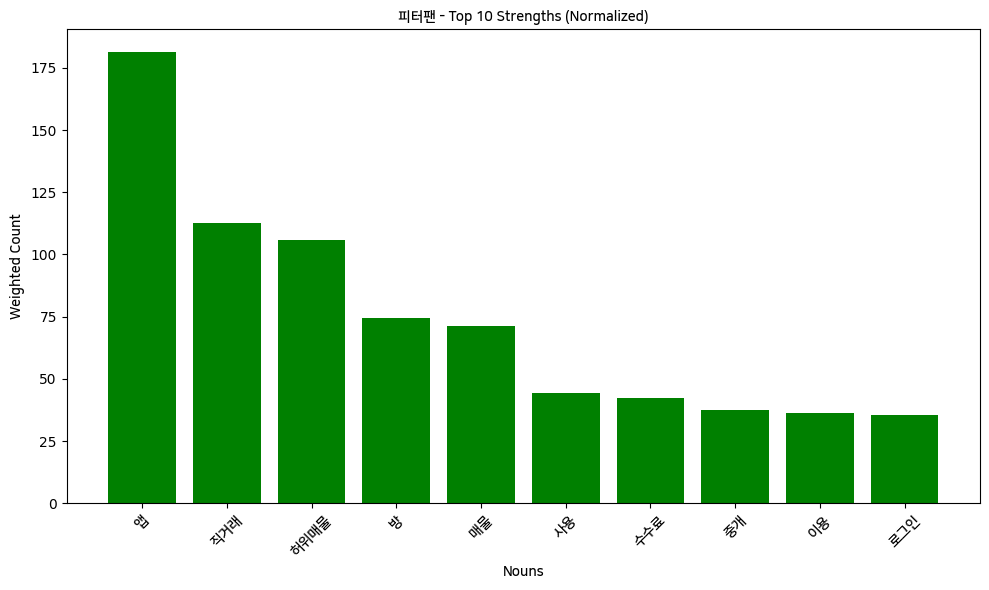

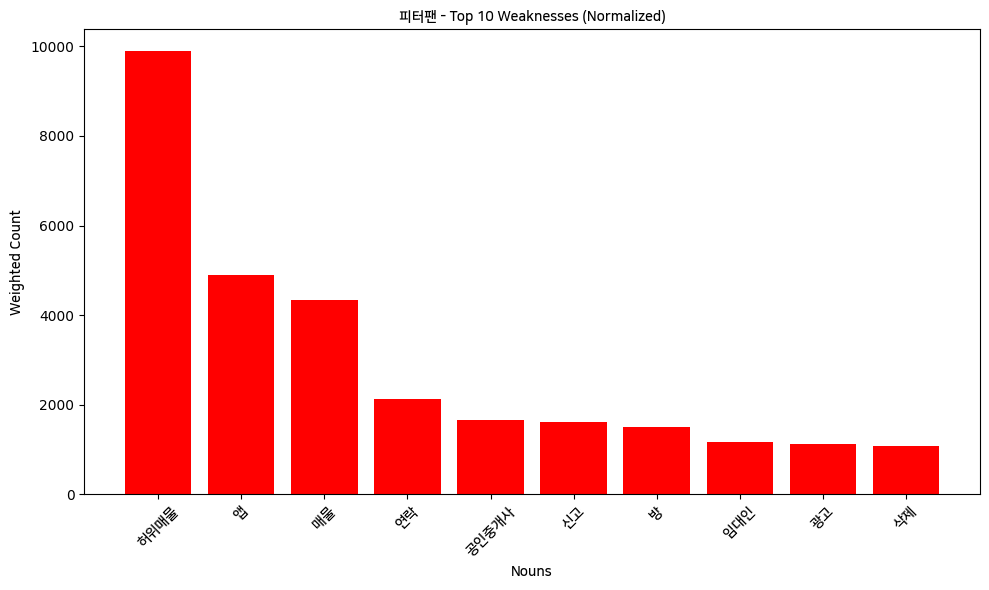

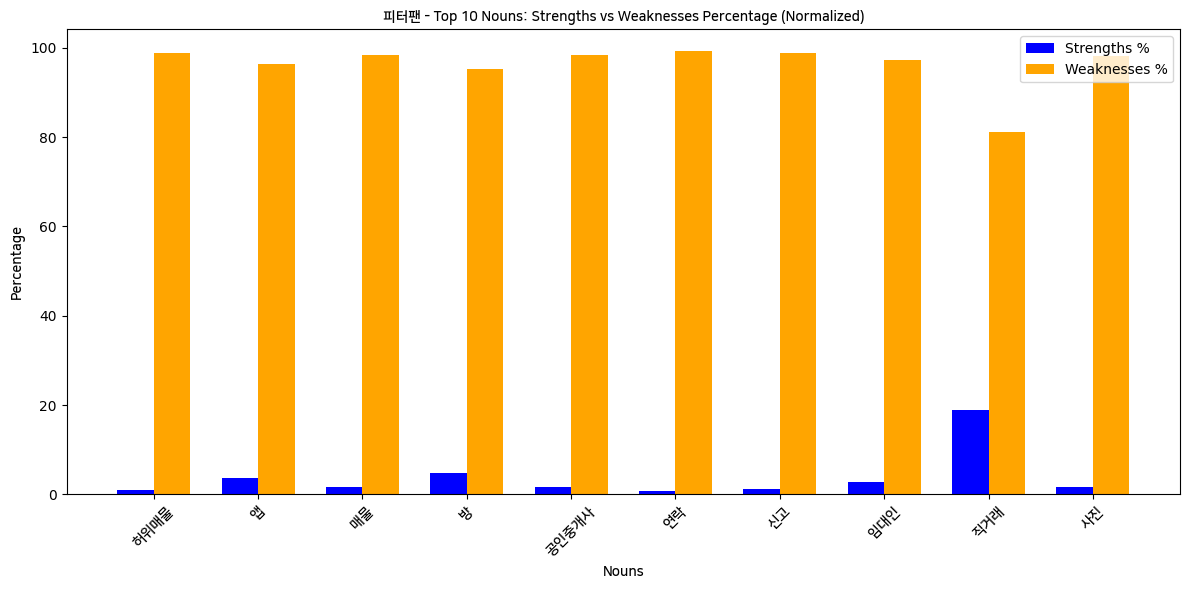

피터팬의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/피터팬_명사_퍼센트_비교_정규화.png에 저장되었습니다.

/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv의 분석 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/호갱노노_정규화_분석결과.csv에 저장되었습니다.
전체 리뷰 수: 2294, 5점 이상 리뷰 수: 1141, 1점 이하 리뷰 수: 619



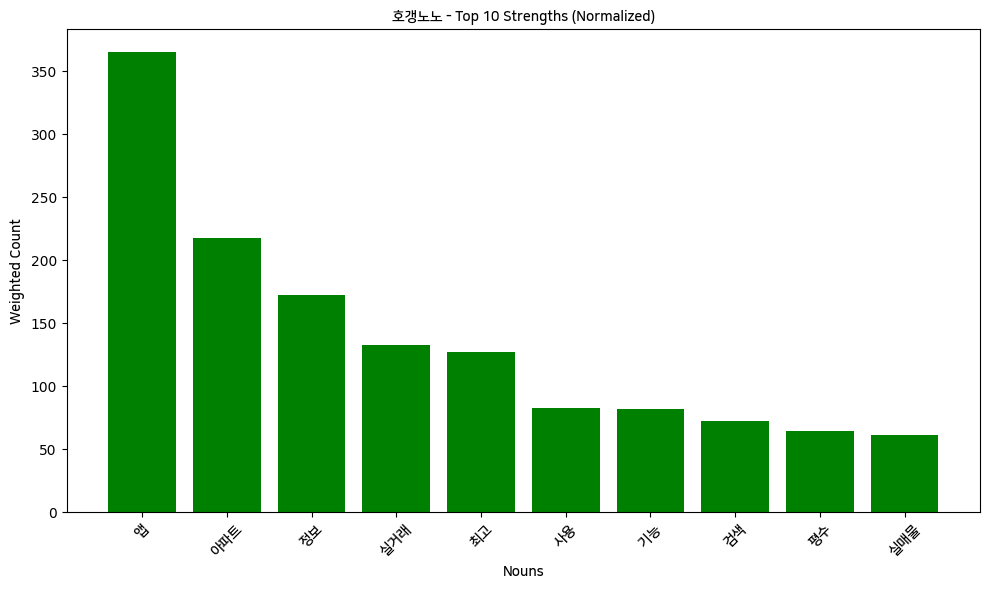

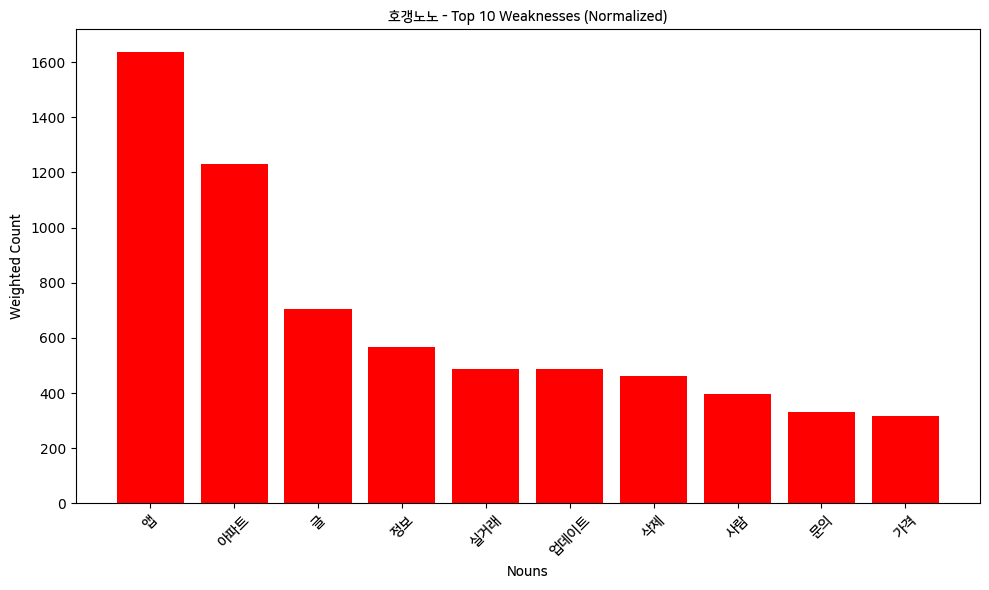

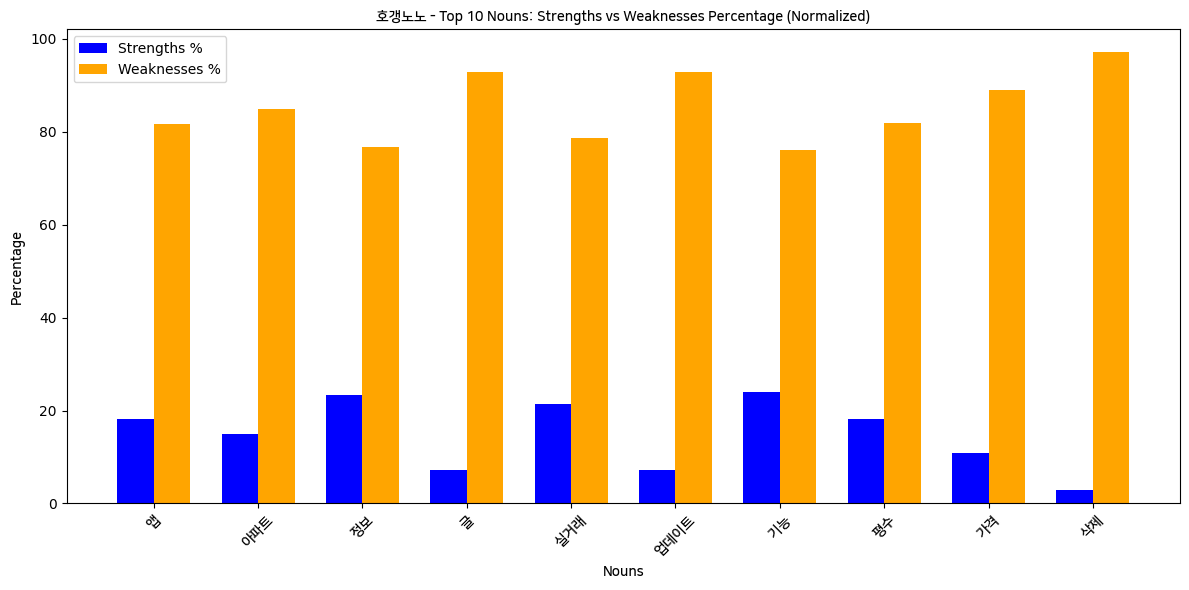

호갱노노의 퍼센트 비교 시각화 결과가 /content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4/호갱노노_명사_퍼센트_비교_정규화.png에 저장되었습니다.



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
import math
import logging

# 경고 및 로그 메시지 억제
warnings.filterwarnings("ignore")  # 일반 경고 억제
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)  # 폰트 경고 억제
plt.rcParams.update({'axes.unicode_minus': False})  # matplotlib의 마이너스 깨짐 방지


# 결과 저장 경로 설정
output_path = '/content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4'
os.makedirs(output_path, exist_ok=True)  # 결과 저장 폴더 생성


# 분석 및 시각화 함수
def classify_and_visualize_with_normalized_weights(file):
    # 데이터 불러오기
    df = pd.read_csv(file)

    # 리뷰 수 계산
    num_positive_reviews = len(df[df['score'] >= 5])  # 5점 이상 리뷰 개수
    num_negative_reviews = len(df[df['score'] <= 1])  # 1점 이하 리뷰 개수
    total_reviews = len(df)  # 전체 리뷰 개수

    # 정규화 비율 계산
    positive_ratio = total_reviews / num_positive_reviews if num_positive_reviews > 0 else 1
    negative_ratio = total_reviews / num_negative_reviews if num_negative_reviews > 0 else 1

    # 강점, 약점 및 전체를 저장할 딕셔너리 초기화
    strengths = {}
    weaknesses = {}
    all_nouns = {}

    # 각 행을 순회하면서 명사 분류
    for _, row in df.iterrows():
        score = row['score']  # 리뷰 평점
        thumbs_up = row.get('thumbsUpCount', 0)  # '좋아요' 수
        weight = math.log(thumbs_up + 1)  # 로그 가중치

        try:
            # 'nouns_without_stopwords'가 문자열로 저장되어 있다면 리스트로 변환
            nouns = ast.literal_eval(row['nouns_without_stopwords'])
        except:
            continue  # 변환에 실패하면 해당 행 건너뜀

        for noun in nouns:
            # 전체 명사에 가중치 누적
            all_nouns[noun] = all_nouns.get(noun, 0) + weight

            # 강점과 약점 분류 및 정규화 적용
            if score >= 5:
                normalized_weight = weight * positive_ratio
                strengths[noun] = strengths.get(noun, 0) + normalized_weight
            elif score <= 1:
                normalized_weight = weight * negative_ratio
                weaknesses[noun] = weaknesses.get(noun, 0) + normalized_weight

    # 명사 정렬
    all_nouns_sorted = sorted(all_nouns.items(), key=lambda x: x[1], reverse=True)
    strengths_sorted = sorted(strengths.items(), key=lambda x: x[1], reverse=True)
    weaknesses_sorted = sorted(weaknesses.items(), key=lambda x: x[1], reverse=True)

    # 데이터프레임 생성 및 비교
    comparison_df = pd.DataFrame({
        'Noun': [x[0] for x in all_nouns_sorted],
        'Overall Weighted Count': [x[1] for x in all_nouns_sorted],
        'Strengths Weighted Count': [strengths.get(x[0], 0) for x in all_nouns_sorted],
        'Weaknesses Weighted Count': [weaknesses.get(x[0], 0) for x in all_nouns_sorted],
    })

    # 강점 및 약점 합 기준 퍼센트 계산
    comparison_df['Total Strengths and Weaknesses'] = (
        comparison_df['Strengths Weighted Count'] + comparison_df['Weaknesses Weighted Count']
    )

    comparison_df['Strengths Percentage'] = (
        comparison_df['Strengths Weighted Count'] / comparison_df['Total Strengths and Weaknesses'] * 100
    ).round(2)

    comparison_df['Weaknesses Percentage'] = (
        comparison_df['Weaknesses Weighted Count'] / comparison_df['Total Strengths and Weaknesses'] * 100
    ).round(2)

    # 파일명에서 출처 이름 추출
    source_name = os.path.basename(file).split('_')[3]

    # 결과 파일 경로 설정
    output_file = os.path.join(output_path, f'{source_name}_정규화_분석결과.csv')
    comparison_df.to_csv(output_file, index=False, encoding='utf-8-sig')

    print(f"{file}의 분석 결과가 {output_file}에 저장되었습니다.")
    print(f"전체 리뷰 수: {total_reviews}, 5점 이상 리뷰 수: {num_positive_reviews}, 1점 이하 리뷰 수: {num_negative_reviews}\n")

    # 강점과 약점 각각 상위 10개
    top_strengths = comparison_df.nlargest(10, 'Strengths Weighted Count')
    top_weaknesses = comparison_df.nlargest(10, 'Weaknesses Weighted Count')

    # 강점 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(top_strengths['Noun'], top_strengths['Strengths Weighted Count'], color='green')
    plt.title(f'{source_name} - Top 10 Strengths (Normalized)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Weighted Count', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f'{source_name}_강점_상위10_정규화.png'))
    plt.show()

    # 약점 시각화
    plt.figure(figsize=(10, 6))
    plt.bar(top_weaknesses['Noun'], top_weaknesses['Weaknesses Weighted Count'], color='red')
    plt.title(f'{source_name} - Top 10 Weaknesses (Normalized)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Weighted Count', fontproperties=font_prop)
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, f'{source_name}_약점_상위10_정규화.png'))
    plt.show()

    # 상위 10개 명사 시각화 (Strengths vs Weaknesses Percentage)
    top_n = 10
    top_nouns = comparison_df.head(top_n)

    # 그래프를 위한 x축 설정
    x = range(len(top_nouns))
    bar_width = 0.35

    plt.figure(figsize=(12, 6))

    # Strengths Percentage 막대
    plt.bar([i - bar_width / 2 for i in x], top_nouns['Strengths Percentage'], width=bar_width, color='blue', label='Strengths %')

    # Weaknesses Percentage 막대
    plt.bar([i + bar_width / 2 for i in x], top_nouns['Weaknesses Percentage'], width=bar_width, color='orange', label='Weaknesses %')

    # 그래프 제목 및 축 레이블
    plt.title(f'{source_name} - Top {top_n} Nouns: Strengths vs Weaknesses Percentage (Normalized)', fontproperties=font_prop)
    plt.xlabel('Nouns', fontproperties=font_prop)
    plt.ylabel('Percentage', fontproperties=font_prop)
    plt.xticks(ticks=x, labels=top_nouns['Noun'], rotation=45, fontproperties=font_prop)

    # 범례 추가
    plt.legend()

    # 레이아웃 및 저장
    plt.tight_layout()
    chart_output_file = os.path.join(output_path, f'{source_name}_명사_퍼센트_비교_정규화.png')
    plt.savefig(chart_output_file)
    plt.show()

    print(f"{source_name}의 퍼센트 비교 시각화 결과가 {chart_output_file}에 저장되었습니다.\n")

# 파일 리스트 정의
files = [
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv',
]

# 모든 파일에 대해 분석 실행
for file in files:
    if os.path.exists(file):
        classify_and_visualize_with_normalized_weights(file)
    else:
        print(f"File not found: {file}")




In [18]:
# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
try:
    font_prop = fm.FontProperties(fname=font_path)
    rc('font', family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False
    font_loaded = True
except Exception:
    print("Warning: Font 'NanumSquare' not found. Using default font.")
    rc('font', family='sans-serif')
    plt.rcParams['axes.unicode_minus'] = False
    font_loaded = False

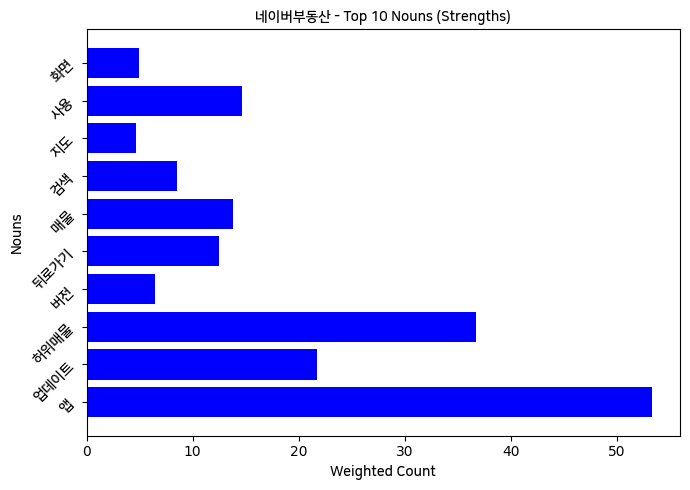

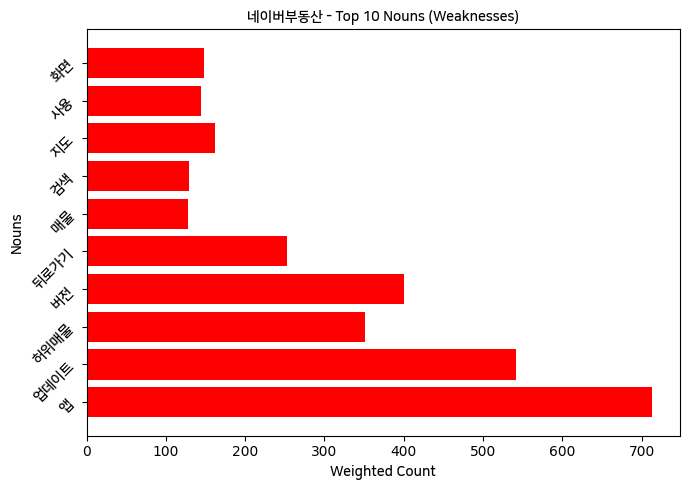

네이버부동산 앱의 강점 및 약점 시각화가 완료되었습니다.


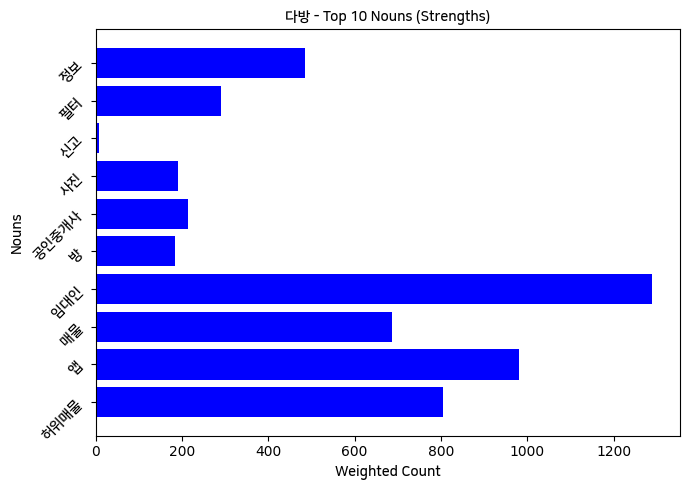

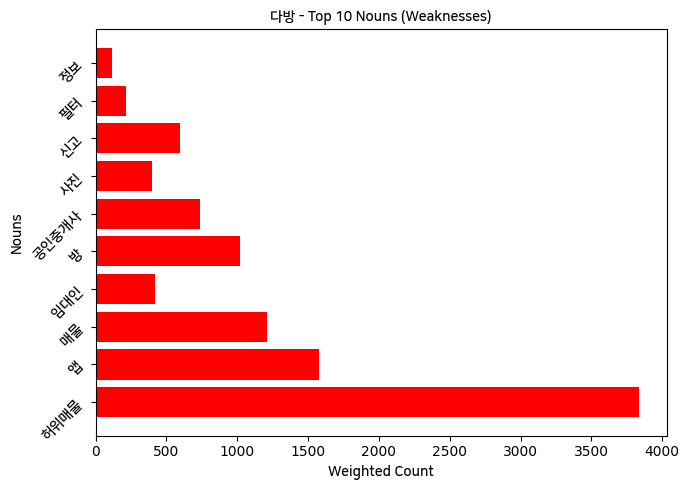

다방 앱의 강점 및 약점 시각화가 완료되었습니다.


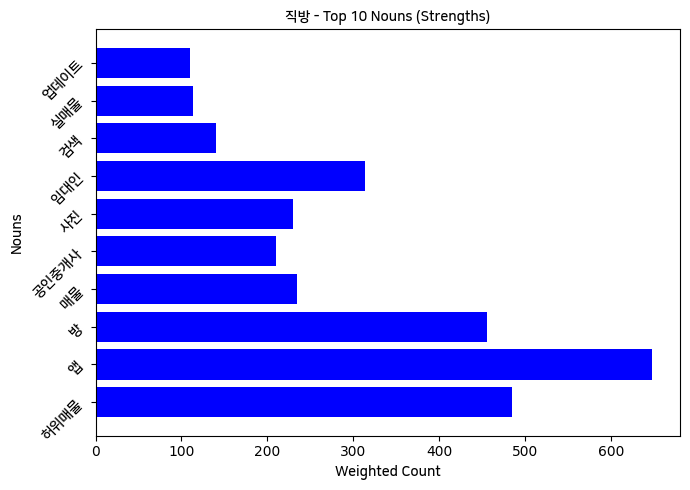

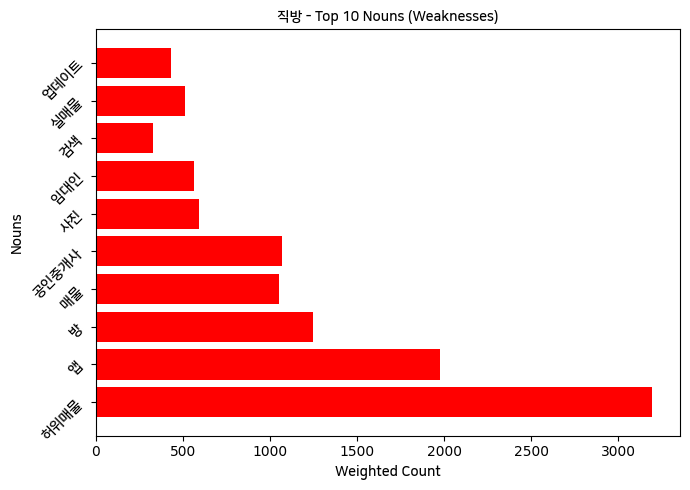

직방 앱의 강점 및 약점 시각화가 완료되었습니다.


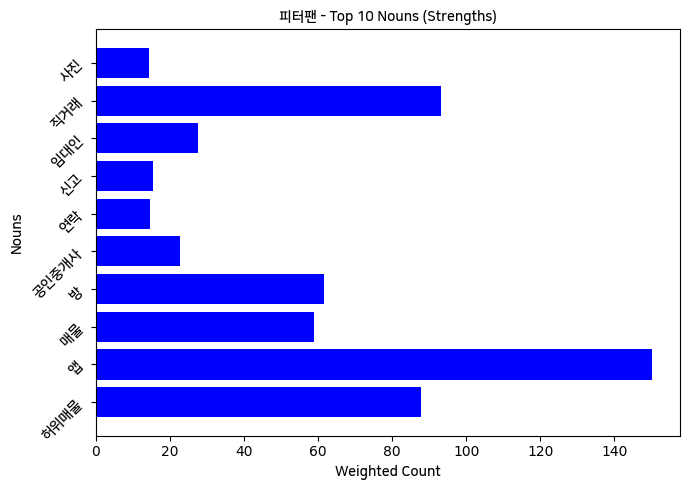

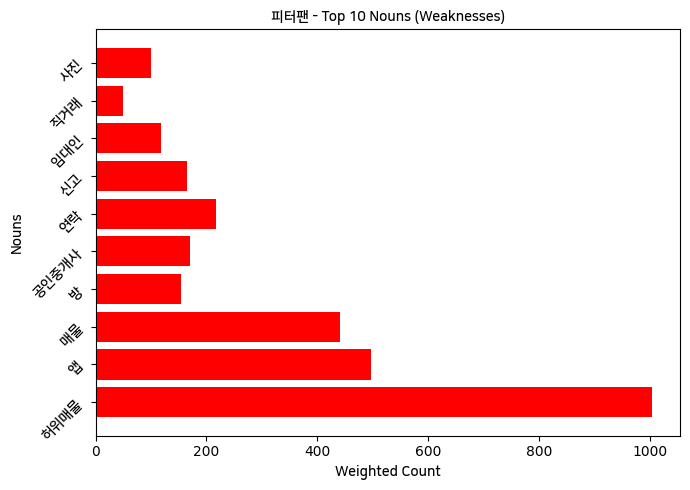

피터팬 앱의 강점 및 약점 시각화가 완료되었습니다.


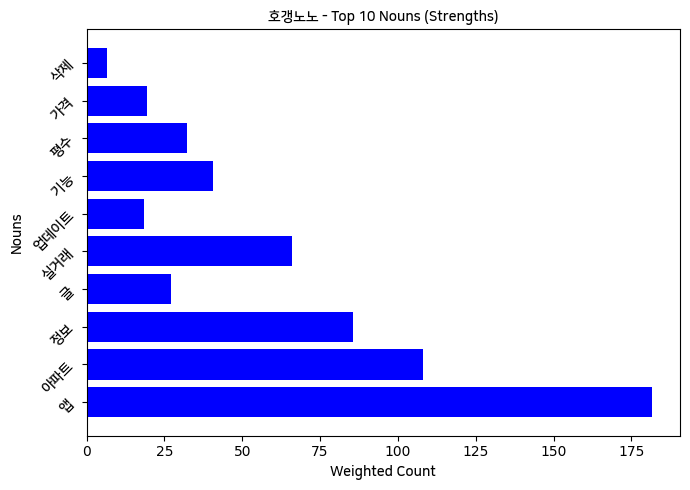

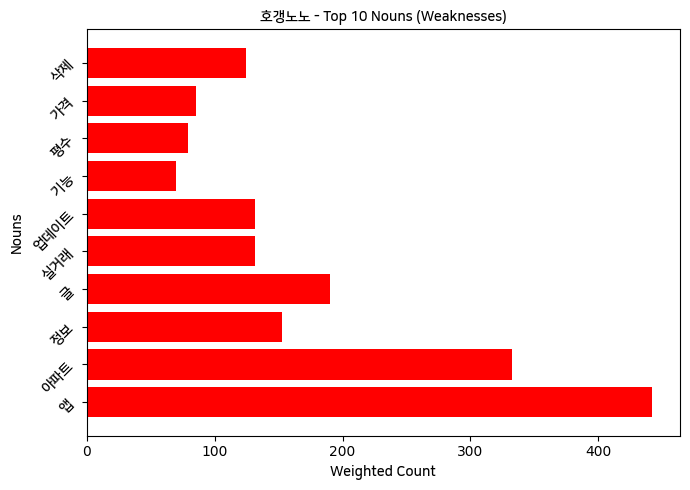

호갱노노 앱의 강점 및 약점 시각화가 완료되었습니다.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
import math

# 결과 저장 경로 설정
output_path = '/content/drive/MyDrive/2024/TextMining/thumbsUp/preprocessed4'
os.makedirs(output_path, exist_ok=True)  # 결과 저장 폴더 생성

# 파일 리스트 정의 (앱별 파일 경로)
files = [
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv',
]

# 앱별 처리
for file in files:
    if os.path.exists(file):
        # 데이터 로드
        df = pd.read_csv(file)

        # 명사 분류 및 로그 가중치 계산
        all_nouns = {}
        strengths = {}
        weaknesses = {}

        for _, row in df.iterrows():
            score = row['score']
            thumbs_up = row.get('thumbsUpCount', 0)
            weight = math.log(thumbs_up + 1)

            try:
                nouns = ast.literal_eval(row['nouns_without_stopwords'])
            except:
                continue

            for noun in nouns:
                # 전체 명사 가중치
                all_nouns[noun] = all_nouns.get(noun, 0) + weight

                # 강점과 약점 분류
                if score >= 5:
                    strengths[noun] = strengths.get(noun, 0) + weight
                elif score <= 1:
                    weaknesses[noun] = weaknesses.get(noun, 0) + weight

        # 전체 명사 중 상위 10개 추출
        top_nouns = sorted(all_nouns.items(), key=lambda x: x[1], reverse=True)[:10]
        top_nouns_list = [x[0] for x in top_nouns]

        # 강점 및 약점 데이터 추출
        strengths_top = [strengths.get(noun, 0) for noun in top_nouns_list]
        weaknesses_top = [weaknesses.get(noun, 0) for noun in top_nouns_list]

        # 파일명에서 앱 이름 추출
        app_name = os.path.basename(file).split('_')[3]

        # 강점 시각화
        plt.figure(figsize=(7, 5))
        plt.barh(top_nouns_list, strengths_top, color='blue')
        plt.title(f'{app_name} - Top 10 Nouns (Strengths)', fontproperties=font_prop)
        plt.xlabel('Weighted Count', fontproperties=font_prop)
        plt.ylabel('Nouns', fontproperties=font_prop)
        plt.yticks(rotation=45, fontproperties=font_prop)
        plt.tight_layout()
        plt.savefig(os.path.join(output_path, f'{app_name}_강점_상위10_로그가중치.png'))
        plt.show()

        # 약점 시각화
        plt.figure(figsize=(7, 5))
        plt.barh(top_nouns_list, weaknesses_top, color='red')
        plt.title(f'{app_name} - Top 10 Nouns (Weaknesses)', fontproperties=font_prop)
        plt.xlabel('Weighted Count', fontproperties=font_prop)
        plt.ylabel('Nouns', fontproperties=font_prop)
        plt.yticks(rotation=45, fontproperties=font_prop)
        plt.tight_layout()
        plt.savefig(os.path.join(output_path, f'{app_name}_약점_상위10_로그가중치.png'))
        plt.show()

        print(f"{app_name} 앱의 강점 및 약점 시각화가 완료되었습니다.")
    else:
        print(f"File not found: {file}")


In [33]:
# 앱별 키워드 분석 결과 저장
app_keywords = {}

# 파일 리스트 정의
files = [
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_다방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_직방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_피터팬_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_네이버부동산_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed4_reviews_data_호갱노노_별점.csv',
]

# 앱별 상위 10개 단어 추출
for file in files:
    if os.path.exists(file):
        # 데이터 로드
        df = pd.read_csv(file)

        # 명사 분류 및 로그 가중치 계산
        all_nouns = {}
        strengths = {}
        weaknesses = {}

        for _, row in df.iterrows():
            score = row['score']
            thumbs_up = row.get('thumbsUpCount', 0)
            weight = math.log(thumbs_up + 1)

            try:
                nouns = ast.literal_eval(row['nouns_without_stopwords'])
            except:
                continue

            for noun in nouns:
                # 전체 명사 가중치
                all_nouns[noun] = all_nouns.get(noun, 0) + weight

                # 강점과 약점 분류
                if score >= 5:
                    strengths[noun] = strengths.get(noun, 0) + weight
                elif score <= 1:
                    weaknesses[noun] = weaknesses.get(noun, 0) + weight

        # 전체 명사 상위 10개 추출
        top_all_nouns = sorted(all_nouns.items(), key=lambda x: x[1], reverse=True)[:10]
        top_all_keywords = {x[0] for x in top_all_nouns}

        # 강점 및 약점 상위 10개 추출
        top_strengths = sorted(strengths.items(), key=lambda x: x[1], reverse=True)[:10]
        top_weaknesses = sorted(weaknesses.items(), key=lambda x: x[1], reverse=True)[:10]
        top_strength_keywords = {x[0] for x in top_strengths}
        top_weakness_keywords = {x[0] for x in top_weaknesses}

        # 앱 이름 추출
        app_name = os.path.basename(file).split('_')[3]

        # 결과 저장
        app_keywords[app_name] = {
            'all': top_all_keywords,
            'strengths': top_strength_keywords,
            'weaknesses': top_weakness_keywords,
        }

# 차별화 키워드 도출
unique_keywords = {}

for app_name, keywords in app_keywords.items():
    # 다른 앱들의 상위 단어 집합
    other_apps = {k: v for k, v in app_keywords.items() if k != app_name}

    # 다른 앱들의 키워드 집합 생성
    other_all_keywords = set().union(*[v['all'] for v in other_apps.values()])
    other_strength_keywords = set().union(*[v['strengths'] for v in other_apps.values()])
    other_weakness_keywords = set().union(*[v['weaknesses'] for v in other_apps.values()])

    # 차별화 키워드 계산
    unique_keywords[app_name] = {
        'all': keywords['all'] - other_all_keywords,
        'strengths': keywords['strengths'] - other_strength_keywords,
        'weaknesses': keywords['weaknesses'] - other_weakness_keywords,
    }

# 결과 출력
for app_name, unique in unique_keywords.items():
    print(f"=== {app_name} 앱의 차별화 키워드 ===")
    print(f"전체 상위 10개 중 차별화 키워드: {unique['all']}")
    print(f"강점 상위 10개 중 차별화 키워드: {unique['strengths']}")
    print(f"약점 상위 10개 중 차별화 키워드: {unique['weaknesses']}")
    print("\n")


=== 다방 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'필터'}
강점 상위 10개 중 차별화 키워드: {'필터', '원룸'}
약점 상위 10개 중 차별화 키워드: {'관리'}


=== 직방 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'실매물'}
강점 상위 10개 중 차별화 키워드: {'사진'}
약점 상위 10개 중 차별화 키워드: {'실매물', '사진'}


=== 피터팬 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'직거래', '연락'}
강점 상위 10개 중 차별화 키워드: {'중개', '수수료', '로그인', '직거래'}
약점 상위 10개 중 차별화 키워드: set()


=== 네이버부동산 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'사용', '뒤로가기', '화면', '버전', '지도'}
강점 상위 10개 중 차별화 키워드: {'순', '보기', '업데이트', '전세', '관심'}
약점 상위 10개 중 차별화 키워드: {'최악', '사용', '보기', '뒤로가기', '화면', '버전', '지도'}


=== 호갱노노 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'아파트', '가격', '실거래', '평수', '글', '기능', '삭제'}
강점 상위 10개 중 차별화 키워드: {'실매물', '아파트', '검색', '평수', '실거래'}
약점 상위 10개 중 차별화 키워드: {'정보', '사람', '문의', '아파트', '실거래', '글'}




In [34]:
# 앱별 키워드 분석 결과 저장
app_keywords = {}

# 파일 리스트 정의
files = [
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_다방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_직방_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_피터팬_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_네이버부동산_별점.csv',
    '/content/drive/MyDrive/2024/TextMining/reviews_data/preprocessed2_reviews_data_호갱노노_별점.csv',
]

# 앱별 상위 10개 단어 추출
for file in files:
    if os.path.exists(file):
        # 데이터 로드
        df = pd.read_csv(file)

        # 명사 분류 및 로그 가중치 계산
        all_nouns = {}
        strengths = {}
        weaknesses = {}

        for _, row in df.iterrows():
            score = row['score']
            thumbs_up = row.get('thumbsUpCount', 0)
            weight = math.log(thumbs_up + 1)

            try:
                nouns = ast.literal_eval(row['nouns_without_stopwords'])
            except:
                continue

            for noun in nouns:
                # 전체 명사 가중치
                all_nouns[noun] = all_nouns.get(noun, 0) + weight

                # 강점과 약점 분류
                if score >= 5:
                    strengths[noun] = strengths.get(noun, 0) + weight
                elif score <= 1:
                    weaknesses[noun] = weaknesses.get(noun, 0) + weight

        # 전체 명사 상위 10개 추출
        top_all_nouns = sorted(all_nouns.items(), key=lambda x: x[1], reverse=True)[:10]
        top_all_keywords = {x[0] for x in top_all_nouns}

        # 강점 및 약점 상위 10개 추출
        top_strengths = sorted(strengths.items(), key=lambda x: x[1], reverse=True)[:10]
        top_weaknesses = sorted(weaknesses.items(), key=lambda x: x[1], reverse=True)[:10]
        top_strength_keywords = {x[0] for x in top_strengths}
        top_weakness_keywords = {x[0] for x in top_weaknesses}

        # 앱 이름 추출
        app_name = os.path.basename(file).split('_')[3]

        # 결과 저장
        app_keywords[app_name] = {
            'all': top_all_keywords,
            'strengths': top_strength_keywords,
            'weaknesses': top_weakness_keywords,
        }

# 차별화 키워드 도출
unique_keywords = {}

for app_name, keywords in app_keywords.items():
    # 다른 앱들의 상위 단어 집합
    other_apps = {k: v for k, v in app_keywords.items() if k != app_name}

    # 다른 앱들의 키워드 집합 생성
    other_all_keywords = set().union(*[v['all'] for v in other_apps.values()])
    other_strength_keywords = set().union(*[v['strengths'] for v in other_apps.values()])
    other_weakness_keywords = set().union(*[v['weaknesses'] for v in other_apps.values()])

    # 차별화 키워드 계산
    unique_keywords[app_name] = {
        'all': keywords['all'] - other_all_keywords,
        'strengths': keywords['strengths'] - other_strength_keywords,
        'weaknesses': keywords['weaknesses'] - other_weakness_keywords,
    }

# 결과 출력
for app_name, unique in unique_keywords.items():
    print(f"=== {app_name} 앱의 차별화 키워드 ===")
    print(f"전체 상위 10개 중 차별화 키워드: {unique['all']}")
    print(f"강점 상위 10개 중 차별화 키워드: {unique['strengths']}")
    print(f"약점 상위 10개 중 차별화 키워드: {unique['weaknesses']}")
    print("\n")


=== 다방 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'다방', '보고'}
강점 상위 10개 중 차별화 키워드: {'다방', '기능', '원룸'}
약점 상위 10개 중 차별화 키워드: {'다방'}


=== 직방 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'사진', '직방'}
강점 상위 10개 중 차별화 키워드: {'방이', '사진'}
약점 상위 10개 중 차별화 키워드: {'사진', '직방'}


=== 피터팬 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'피터팬', '연락'}
강점 상위 10개 중 차별화 키워드: {'직거래', '피터팬'}
약점 상위 10개 중 차별화 키워드: {'피터팬', '연락'}


=== 네이버부동산 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'전', '검색', '버전', '네이버', '업데이트'}
강점 상위 10개 중 차별화 키워드: {'순', '보기', '네이버', '전세', '관심'}
약점 상위 10개 중 차별화 키워드: {'최악', '전', '버전', '네이버', '업데이트'}


=== 호갱노노 앱의 차별화 키워드 ===
전체 상위 10개 중 차별화 키워드: {'정보', '호갱', '거래', '아파트', '실', '글'}
강점 상위 10개 중 차별화 키워드: {'호갱', '거래', '아파트', '실', '최고'}
약점 상위 10개 중 차별화 키워드: {'정보', '호갱', '거래', '아파트', '실', '글', '삭제'}


